# Importar librerías

In [215]:
#from google.colab import drive
#drive.mount('/content/drive')

In [216]:
# Poner en todas as columnas el punto describe

In [217]:
# Importar todas las bibliotecas necesarias para los ejercicios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_rel
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from imblearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from statsmodels.tools import add_constant

# Importar base de datos

In [218]:
#df = pd.read_excel("/content/drive/MyDrive/Proyecto analitica /PublicHospitalDataset - Copy.xlsx")

In [219]:
#Se lee el archivo csv

df = pd.read_excel("PublicHospitalDataset - Copy.xlsx")

# Creamos una copia del dataframe
df2 = df.copy()
df2.head(5)

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
0,1,0,Yes,Private,Rural,190.14,36.5,never smoked,Female,73.0,0.0,3,1
1,0,0,Yes,Private,Urban,208.65,30.7,never smoked,Male,63.0,1302.0,0,1
2,0,0,Yes,Private,Rural,93.81,28.5,Unknown,Male,69.0,1887.0,1,1
3,0,1,Yes,Govt_job,Rural,103.68,25.0,never smoked,Male,82.0,2509.0,0,1
4,0,0,Yes,Private,Rural,137.30,31.7,formerly smoked,Male,63.0,3079.0,2,1


# Analizar base de datos

## Descripción General

### Tamaño de la base de datos

In [220]:
# Tamaño base de datos
df2.shape

(5112, 13)

### Tipos de datos

In [221]:
# Tipos de datos y nulos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5112 non-null   int64  
 1   Heart Disease      5112 non-null   object 
 2   Married            5112 non-null   object 
 3   Work               5112 non-null   object 
 4   Residence          5112 non-null   object 
 5   Avg_glucose_level  5112 non-null   float64
 6   Bmi                4911 non-null   float64
 7   Smoking            5112 non-null   object 
 8   Gender             5112 non-null   object 
 9   Age                5112 non-null   float64
 10  Income             5085 non-null   float64
 11  Children           5112 non-null   int64  
 12  Stroke             5112 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 519.3+ KB


### Datos nulos

**Cantidad de datos**

In [222]:
# Cantidad de datos nulos
df2.isnull().sum()

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Income                27
Children               0
Stroke                 0
dtype: int64

**Porcentaje de datos nulos**

In [223]:
# Calculamos el porcentaje de datos nulos de cada variable
percent = round(df2.isnull().mean()*100,2)
print(percent)

Hypertension         0.00
Heart Disease        0.00
Married              0.00
Work                 0.00
Residence            0.00
Avg_glucose_level    0.00
Bmi                  3.93
Smoking              0.00
Gender               0.00
Age                  0.00
Income               0.53
Children             0.00
Stroke               0.00
dtype: float64


### Datos en blanco

In [224]:
# Datos blancos
(df2 == '').sum()

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Income               0
Children             0
Stroke               0
dtype: int64

## Descripción por columna categórica y análisis de valores nulos

### BMI

In [225]:
# Estadísticas básicas de BMI
df2["Bmi"].describe()

count     4911.000000
mean        61.449277
std       1140.430359
min         10.300000
25%         23.500000
50%         28.100000
75%         33.100000
max      40000.000000
Name: Bmi, dtype: float64

In [226]:
# Cambiamos el dato atipico de 40000 a 40, considerando que fue un typo
df2.loc[df2["Bmi"]>= 1000, "Bmi"] /= 1000

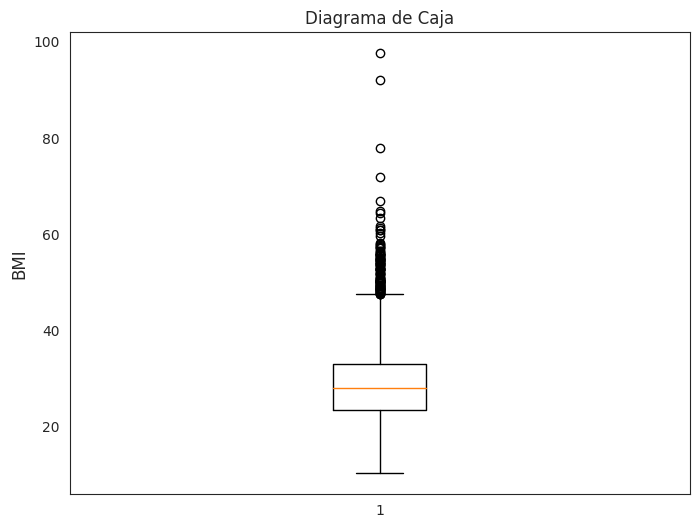

In [227]:
# Se determina tamaño de figura a crearse
plt.figure(figsize=(8, 6))

# Se realiza boxplot para ver distribución y valores atípicos de BMI
plt.boxplot(df2['Bmi'].dropna())
plt.title('Diagrama de Caja', fontsize = 12)
plt.ylabel('BMI', fontsize = 12)
#plt.savefig('BMI1.pdf', format ="pdf", dpi=150)
plt.show()

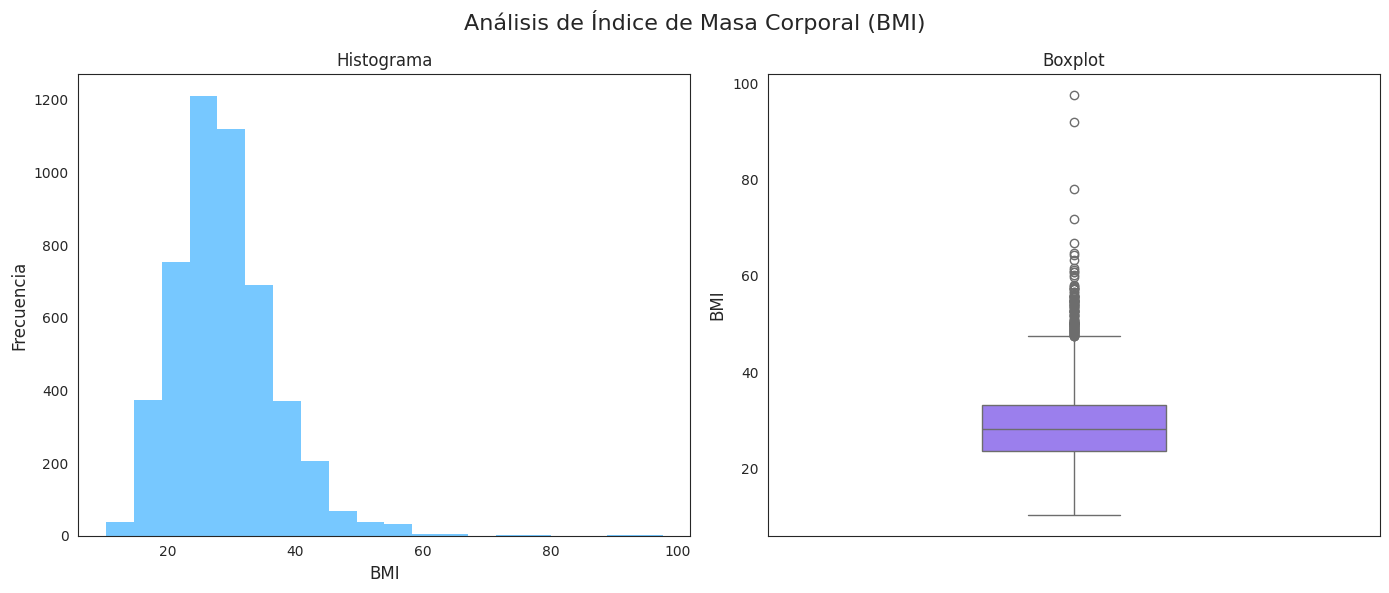

In [228]:
# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con Seaborn y se personaliza el gráfico
sns.histplot(data=df2, x='Bmi', bins=20, edgecolor='none', ax=axes[0], color=sns.color_palette("cool")[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma', fontsize = 12)
axes[0].set_xlabel('BMI', fontsize = 12)
axes[0].set_ylabel('Frecuencia', fontsize = 12)

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Bmi', ax=axes[1], color=sns.color_palette("cool")[3], width = 0.3)  # Segundo color de la paleta "cool"
axes[1].set_title('Boxplot', fontsize = 12)
axes[1].set_ylabel('BMI', fontsize = 12)

# Título general central
plt.suptitle('Análisis de Índice de Masa Corporal (BMI)', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos y descargar
#plt.savefig('BMI2.pdf', format ="pdf", dpi=150)
plt.show()

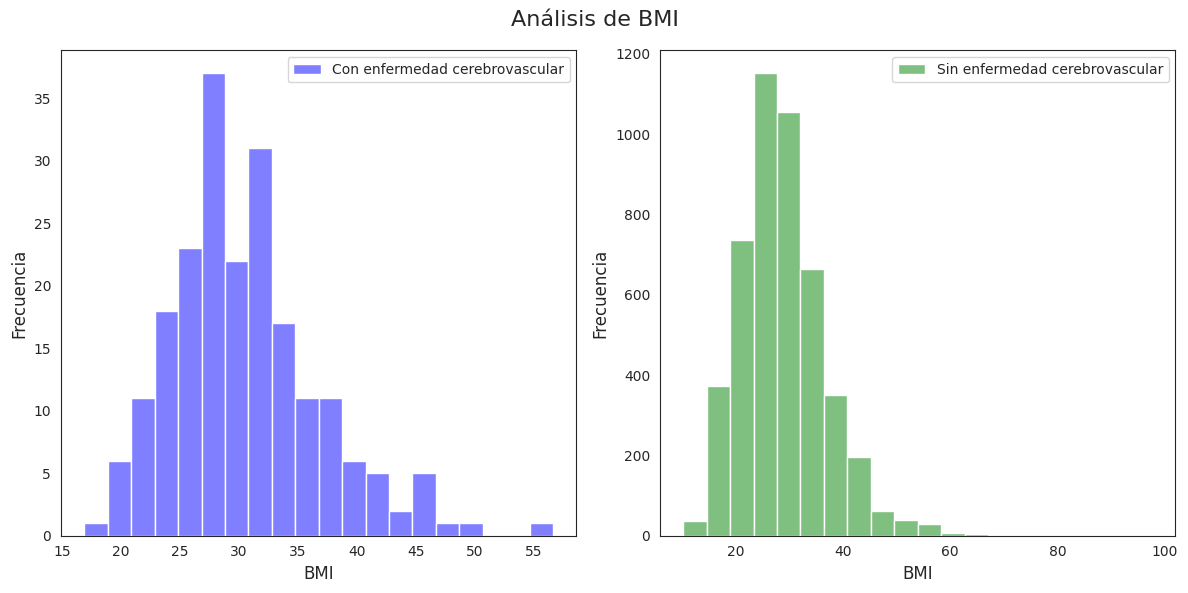

In [229]:
# Filtrar pacientes que sí tuvieron una enfermedad cerebrovascular
df_con_ecv = df2[df2['Stroke'] == 1]

# Filtrar pacientes que no tuvieron una enfermedad cerebrovascular
df_sin_ecv = df2[df2['Stroke'] == 0]

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Crear histograma para pacientes con enfermedad cerebrovascular
sns.histplot(data=df_con_ecv, x='Bmi', bins=20, color='blue', alpha=0.5, label='Con enfermedad cerebrovascular', ax=axes[0])
axes[0].set_xlabel('BMI', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].legend()
axes[0].grid(False)

# Crear histograma para pacientes sin enfermedad cerebrovascular
sns.histplot(data=df_sin_ecv, x='Bmi', bins=20, color='green', alpha=0.5, label='Sin enfermedad cerebrovascular', ax=axes[1])
axes[1].set_xlabel('BMI', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].legend()
axes[1].grid(False)

# Título general central
plt.suptitle('Análisis de BMI', fontsize=16)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
#plt.savefig('BMI_ataque.pdf', format ="pdf", dpi=150)
plt.show()

In [230]:
# Elimina todos los valores mayores a 54
df2 = df2[df2["Bmi"] <= 54]

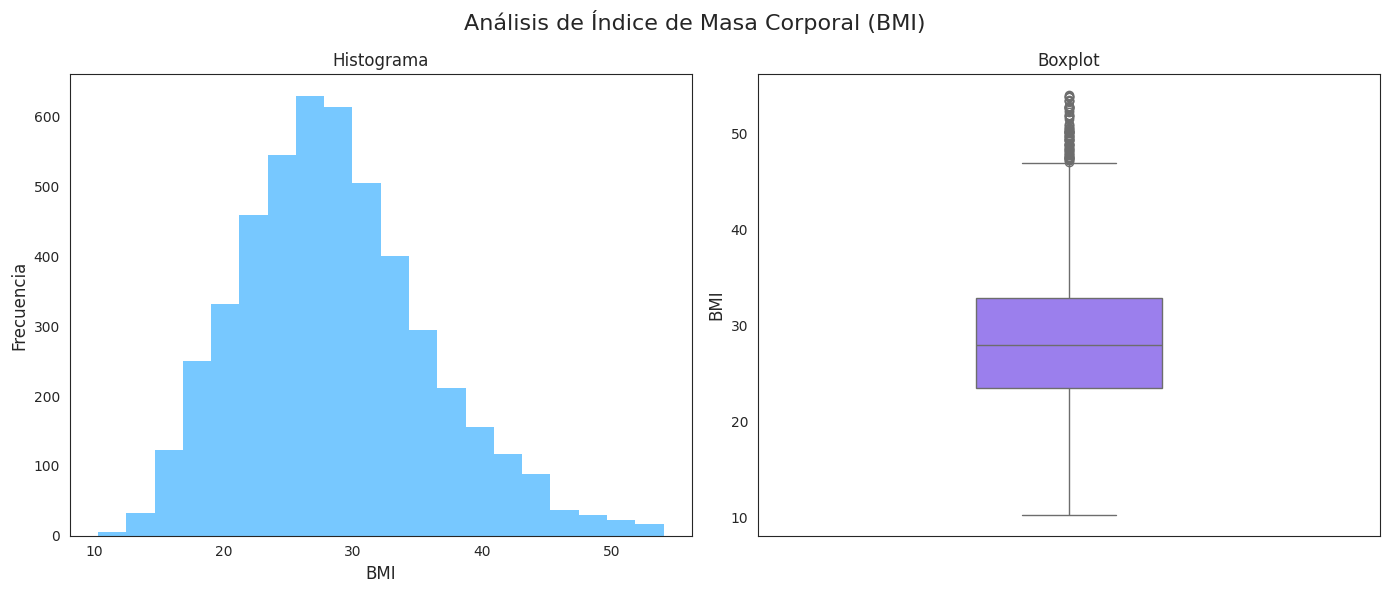

In [231]:
# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con Seaborn
sns.histplot(data=df2, x='Bmi', bins=20, edgecolor='none', ax=axes[0], color=sns.color_palette("cool")[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma', fontsize = 12)
axes[0].set_xlabel('BMI', fontsize = 12)
axes[0].set_ylabel('Frecuencia', fontsize = 12)

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Bmi', ax=axes[1], color=sns.color_palette("cool")[3], width = 0.3)  # Segundo color de la paleta "cool"
axes[1].set_title('Boxplot', fontsize = 12)
axes[1].set_ylabel('BMI', fontsize = 12)

# Título general central
plt.suptitle('Análisis de Índice de Masa Corporal (BMI)', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
#plt.savefig('BMI3.pdf', format ="pdf", dpi=150)
plt.show()

In [232]:
# Calcular el valor de la mediana de la columna BMI
BMI_median = df2['Bmi'].median()

# Reemplazar valores nulos de BMI por la mediana
df2['Bmi'].fillna(BMI_median, inplace=True)

### Income

In [233]:
#Estadísticas generales de income
df2["Income"].describe()

count      4840.000000
mean     116538.611983
std       87211.769073
min           0.000000
25%       42783.500000
50%      101421.000000
75%      183250.250000
max      849615.000000
Name: Income, dtype: float64

In [234]:
#Cantidad de valores nulos
df2["Income"].isnull().sum()

27

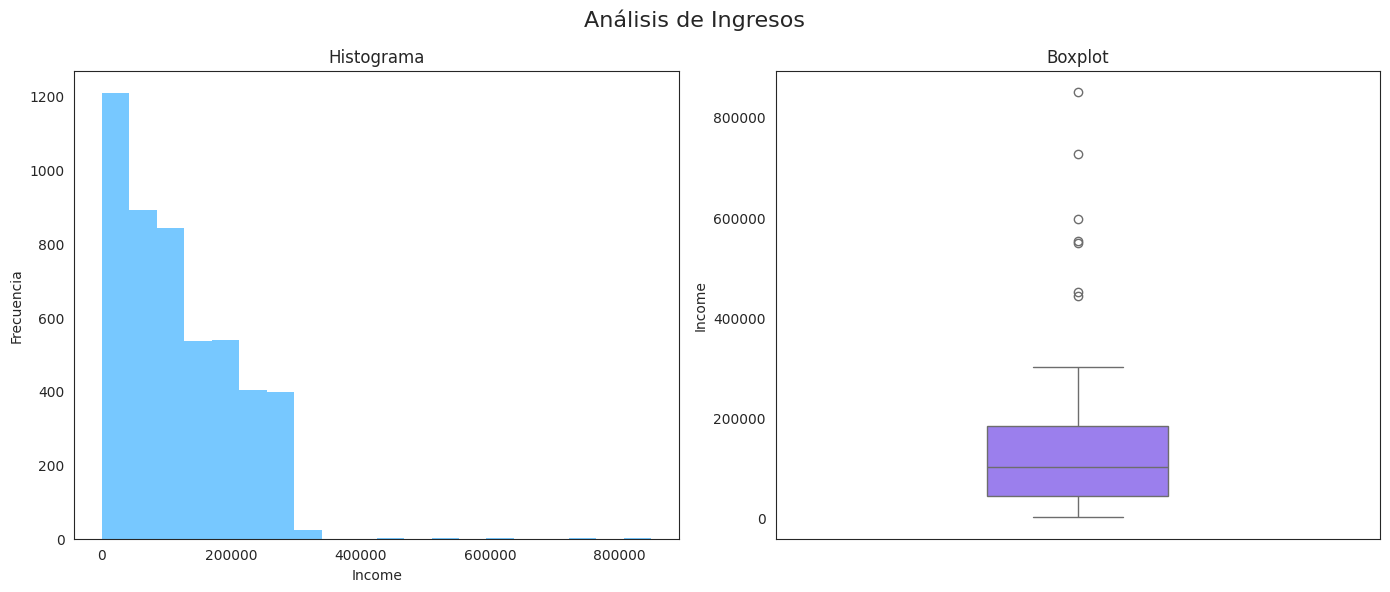

In [235]:
# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con Seaborn
sns.histplot(data=df2, x='Income', bins=20, edgecolor='none', ax=axes[0], color=sns.color_palette("cool")[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frecuencia')

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Income', ax=axes[1], color=sns.color_palette("cool")[3], width = 0.3)  # Segundo color de la paleta "cool"
axes[1].set_title('Boxplot')
axes[1].set_ylabel('Income')

# Título general central
plt.suptitle('Análisis de Ingresos', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
#plt.savefig('Ingresos.pdf', format ="pdf", dpi=150)
plt.show()

In [236]:
# Calcular la mediana de la columna "Income"
income_median = df2['Income'].median()

# Llenar los valores nulos en la columna 'Income' con la mediana y guardar como tipo entero
df2['Income'].fillna(income_median, inplace=True)
df2["Income"] = df2["Income"].astype(int)

### Hipertensión

In [237]:
#Estadísticas básicas de la columna
df2["Hypertension"].describe()

count    4867.000000
mean        0.090405
std         0.286790
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Hypertension, dtype: float64

In [238]:
# Conteo de casos positivos y negativos de hipertensión y transformación a entero
df2['Hypertension'] = df2['Hypertension'].astype(np.uint64)
df["Hypertension"].value_counts()

Hypertension
0    4613
1     499
Name: count, dtype: int64

In [239]:
# Calculo de frecuencia como porcentajes
df2["Hypertension"].value_counts(normalize = True)*100

Hypertension
0    90.959523
1     9.040477
Name: proportion, dtype: float64

<ipython-input-240-0ec4a28d15c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hypertension', data=df2, palette=palette, ax=ax)
<ipython-input-240-0ec4a28d15c1>:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Hypertension', data=df2, palette=palette, ax=ax)


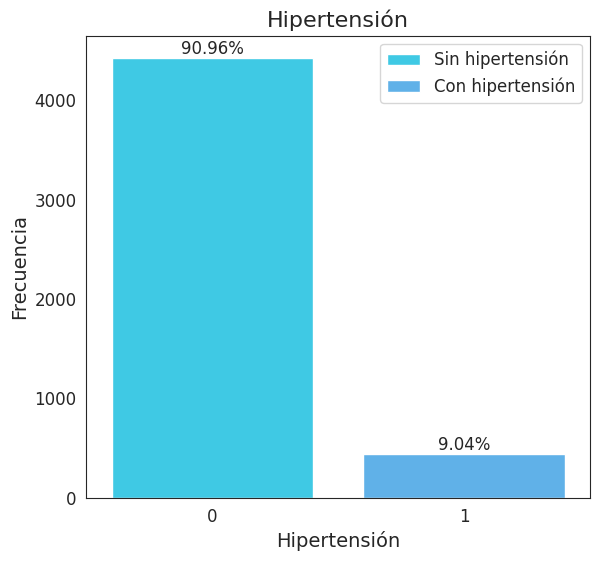

In [240]:
# Total en columnas
total = float(len(df2))
palette = sns.color_palette("cool")

# Figura y los ejes con un tamaño personalizado
fig, ax = plt.subplots(figsize=(6.5, 6))  # Ajusta el tamaño de la figura

# Gráfico de barras
sns.countplot(x='Hypertension', data=df2, palette=palette, ax=ax)

# Porcentajes de las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom', fontsize=12)

# Título y etiquetas
plt.title('Hipertensión', fontsize=16)
plt.xlabel('Hipertensión', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalización de ejes y leyenda
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['Sin hipertensión', 'Con hipertensión'], fontsize=12)

# Mostrar el gráfico
#plt.savefig('Hipertension.pdf', format ="pdf", dpi=150)
plt.show()

### Heart Disease

In [241]:
#Estadísticas básicas de la columna
df2["Heart Disease"].describe()

count     4867
unique       3
top          0
freq      4624
Name: Heart Disease, dtype: int64

In [242]:
# Conteo de pacientes que han sufrido enfermedad cardíaca
df2["Heart Disease"].value_counts()

Heart Disease
0     4624
1      242
No       1
Name: count, dtype: int64

In [243]:
# Se cambia el No por "1", para que se queden todos los valores entre 0 y 1. Se cambia el tipo de dato a entero
df2['Heart Disease'] = df2['Heart Disease'].map({'No': 0}).fillna(df2['Heart Disease'])
df2['Heart Disease'] = df2['Heart Disease'].astype(np.uint64)
df2["Heart Disease"].value_counts()

Heart Disease
0    4625
1     242
Name: count, dtype: int64

In [244]:
# Frecuencia de casos de enfermedad cardíaca como porcentaje
df2["Heart Disease"].value_counts(normalize = True)*100

Heart Disease
0    95.027738
1     4.972262
Name: proportion, dtype: float64

<ipython-input-245-e77985689395>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Heart Disease', data=df2, palette=palette)
<ipython-input-245-e77985689395>:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(x='Heart Disease', data=df2, palette=palette)


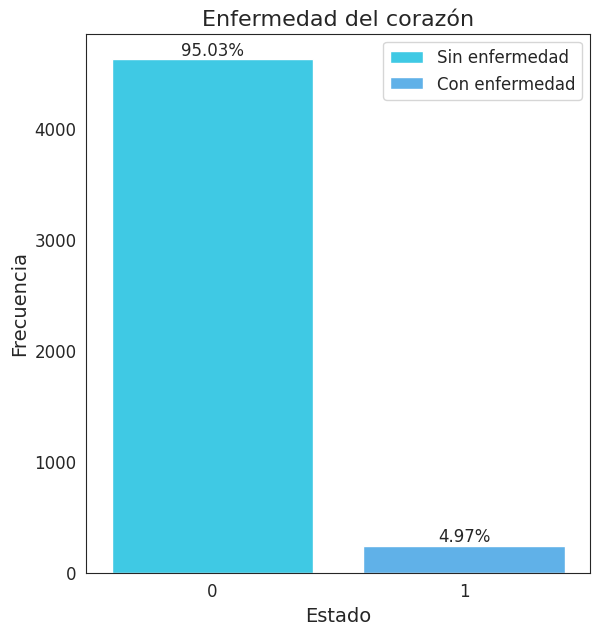

In [245]:
# Calcular total de casos para obtener porcentaje de cada caso
total = float(len(df2))
palette = sns.color_palette("cool")

# Crear la figura y los ejes con un tamaño personalizado
fig, ax = plt.subplots(figsize=(6.5, 7))  # Ajusta el tamaño de la figura
ax = sns.countplot(x='Heart Disease', data=df2, palette=palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom', fontsize = 12)

# Añadir título y etiquetas
plt.title('Enfermedad del corazón', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['Sin enfermedad', 'Con enfermedad'], fontsize=12)

# Mostrar el gráfico
#plt.savefig('Corazon.pdf', format ="pdf", dpi=150)
plt.show()

### Married

In [246]:
#Estadísticas básicas de la columna
df2["Married"].describe()

count     4867
unique       2
top        Yes
freq      3172
Name: Married, dtype: object

In [247]:
# Conteo de casos casados y no casados
df2["Married"].value_counts()

Married
Yes    3172
No     1695
Name: count, dtype: int64

In [248]:
# Se cambian los valores "Yes" a 1 y "No" a 0 para mantener formato
# Se cambia el tipo de dato a entero
df2["Married"].value_counts()
df2['Married'] = df2['Married'].map({'No': 0, 'Yes': 1}).fillna(df2['Married'])
df2['Married'] = df2['Married'].astype(np.uint64)
df2["Married"].value_counts()

Married
1    3172
0    1695
Name: count, dtype: int64

In [249]:
# Cáclulo de frecuencia como porcentaje
df2["Married"].value_counts(normalize = True)*100

Married
1    65.173618
0    34.826382
Name: proportion, dtype: float64

<ipython-input-250-a2c97a3412a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Married', data=df2, palette=palette)


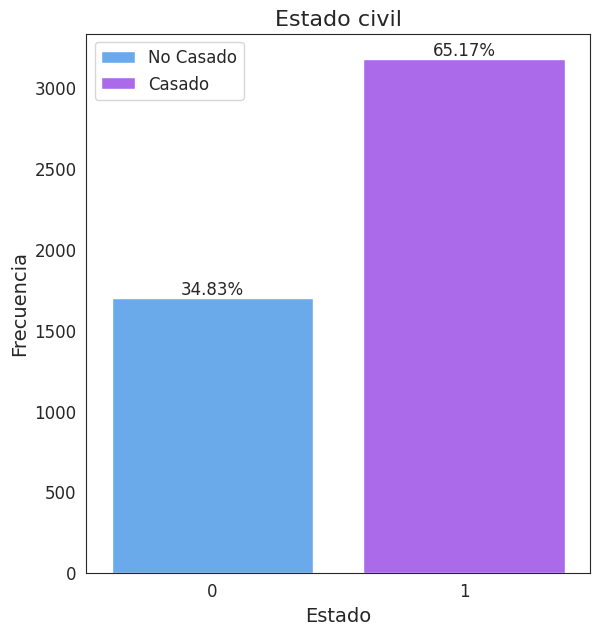

In [250]:
# Calcular el porcentaje de cada categoría
total = float(len(df2))
palette = sns.color_palette("cool", 2)
fig, ax = plt.subplots(figsize=(6.5, 7))
ax = sns.countplot(x='Married', data=df2, palette=palette)

# Poner el porcentaje sobre la barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom', fontsize = 12)

# Añadir título y etiquetas
plt.title('Estado civil', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['No Casado', 'Casado'], fontsize=12)

# Mostrar el gráfico
#plt.savefig('Casado.pdf', format ="pdf", dpi=150)
plt.show()

### Work

In [251]:
#Estadísticas básicas de la columna
df2["Work"].describe()

count        4867
unique          9
top       Private
freq         2772
Name: Work, dtype: object

In [252]:
# Conteo de cada categoría de variable work
df2["Work"].value_counts()

Work
Private          2772
Self-employed     767
children          672
Govt_job          626
Never_worked       22
sdfsdf              3
kñsdh-k             2
dsfsdf              2
sdsd-i              1
Name: count, dtype: int64

In [253]:
# Añadir errores de categorías a una categoría llamada Inconsistente
# Se puso el nombre de la categoría igual que en el documento
df2['Work'] = df2['Work'].map({'Govt_job': 'Govt_jov', 'children': 'Children', 'kñsdh-k': 'Inconsistente', 'sdfsdf': 'Inconsistente', 'dsfsdf': 'Inconsistente', 'sdsd-i': 'Inconsistente'}).fillna(df2['Work'])

In [254]:
# Conteo de valores con cambios realizados
df2["Work"].value_counts()

Work
Private          2772
Self-employed     767
Children          672
Govt_jov          626
Never_worked       22
Inconsistente       8
Name: count, dtype: int64

In [255]:
# Frecuencia de valores de work como porcentaje
df2["Work"].value_counts(normalize = True)*100

Work
Private          56.955003
Self-employed    15.759195
Children         13.807273
Govt_jov         12.862133
Never_worked      0.452024
Inconsistente     0.164372
Name: proportion, dtype: float64

<ipython-input-256-7266675ac221>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)


<Figure size 800x600 with 0 Axes>

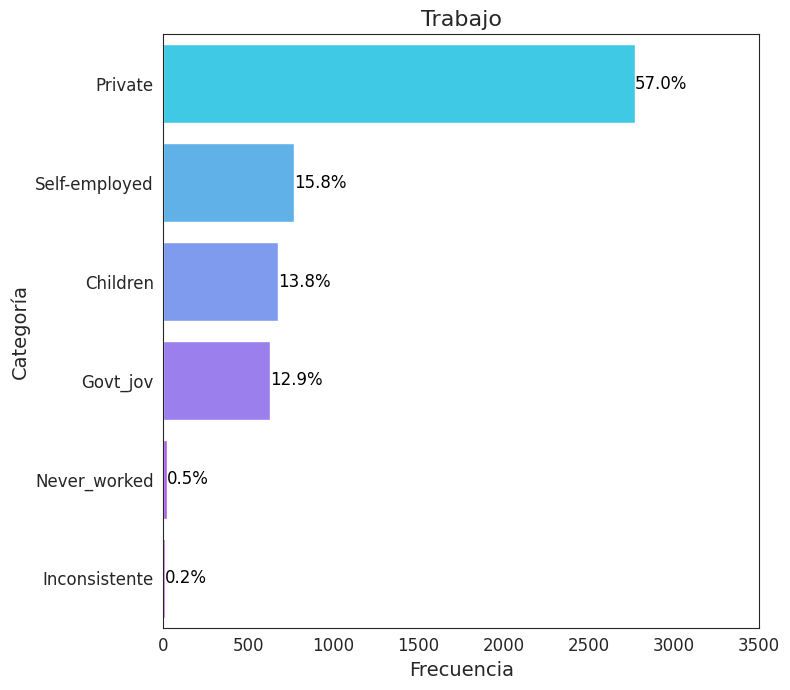

In [256]:
# Calcular la frecuencia de cada categoría
frecuencia_categoria = df2['Work'].value_counts().reset_index()
frecuencia_categoria.columns = ['Categoría', 'Frecuencia']
frecuencia_categoria = frecuencia_categoria.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
palette = sns.color_palette("cool")
fig, ax = plt.subplots(figsize=(8, 7))  # Ajusta el tamaño de la figura
ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)

# Añadir porcentaje sobre las barras
total_observaciones = len(df2)
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_width() / total_observaciones) # Calcular el porcentaje
    x = p.get_width()  # Posición x del texto
    y = p.get_y() + p.get_height() / 2  # Posición y del texto
    ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=12, color='black')

plt.xlim(0, 3500)
# Añadir título y etiquetas
plt.title('Trabajo', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel("Categoría", fontsize = 14)

# Personalizar los ejes si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
#plt.savefig('Trabajo.pdf', format ="pdf", dpi=150)
plt.show()

In [257]:
# Eliminar los registros que contienen "Inconsistente" en la columna "work"
df2 = df2[df2['Work'] != 'Inconsistente']

### Residents

In [258]:
#Estadísticas básicas de la columna
df2["Residence"].describe()

count      4859
unique        2
top       Urban
freq       2466
Name: Residence, dtype: object

In [259]:
df2["Residence"].value_counts()

Residence
Urban    2466
Rural    2393
Name: count, dtype: int64

In [260]:
# Se cambian valores en las columnas por 0 y 1
# Se cambia el tipo de dato a entero
# Urban = 0, Rural = 1
df2['Residence'] = df2['Residence'].map({'Urban': 0, 'Rural': 1}).fillna(df2['Residence'])
df2['Residence'] = df2['Residence'].astype(np.uint64)

# Conteo de casos de residence
df2["Residence"].value_counts()

<ipython-input-260-26cbafd1f03a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Residence'] = df2['Residence'].map({'Urban': 0, 'Rural': 1}).fillna(df2['Residence'])
<ipython-input-260-26cbafd1f03a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Residence'] = df2['Residence'].astype(np.uint64)


Residence
0    2466
1    2393
Name: count, dtype: int64

In [261]:
# Frecuencia de cada caso porcentual
df2["Residence"].value_counts(normalize = True)*100

Residence
0    50.751183
1    49.248817
Name: proportion, dtype: float64

<ipython-input-262-9538426524d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Residence', data=df2, palette=palette)


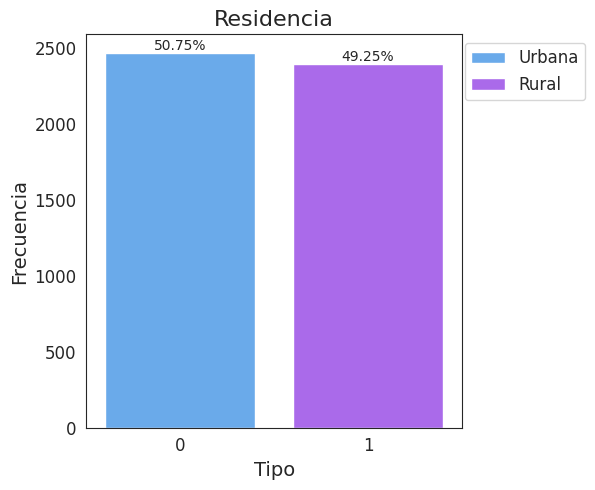

In [262]:
# Crear el gráfico
total = float(len(df2))
palette = sns.color_palette("cool",2)
fig, ax = plt.subplots(figsize=(6.5, 5))  # Ajusta el tamaño de la figura
ax = sns.countplot(x='Residence', data=df2, palette=palette)

# Porcentaje encima de la barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Residencia', fontsize=16)
plt.xlabel('Tipo', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mover la leyenda a una ubicación adecuada
plt.legend(fontsize=12, title_fontsize='14', loc='upper right', bbox_to_anchor=(1.35, 1), labels=['Urbana', 'Rural'])

# Ajustar el diseño para que la leyenda no se solape con el gráfico
plt.tight_layout()

# Mostrar el gráfico
#plt.savefig('Residenca.pdf', format ="pdf", dpi=150)
plt.show()

### Smoking

In [263]:
#Estadísticas básicas de la columna
df2["Smoking"].describe()

count             4859
unique               5
top       never smoked
freq              1826
Name: Smoking, dtype: object

In [264]:
# Conteo de casos de la columna smoking
df2["Smoking"].value_counts()

Smoking
never smoked       1826
Unknown            1473
formerly smoked     832
smokes              727
weed                  1
Name: count, dtype: int64

In [265]:
# Columna Smoking
# Incluimos el dato weed en smokes, dado que solo hay un caso y si es fumador. Si tendriamos mas casos de weed, lo dejariamos como una categoria propia
df2['Smoking'] = df2['Smoking'].map({'weed': 'smokes'}).fillna(df2['Smoking'])

In [266]:
# Contar las veces que sale cada categoría
df2["Smoking"].value_counts()

Smoking
never smoked       1826
Unknown            1473
formerly smoked     832
smokes              728
Name: count, dtype: int64

In [267]:
# Frecuencia porcentual de casos de smoked
df2["Smoking"].value_counts(normalize = True)*100

Smoking
never smoked       37.579749
Unknown            30.314880
formerly smoked    17.122865
smokes             14.982507
Name: proportion, dtype: float64

<ipython-input-268-fd98c9915dd5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)
<ipython-input-268-fd98c9915dd5>:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)


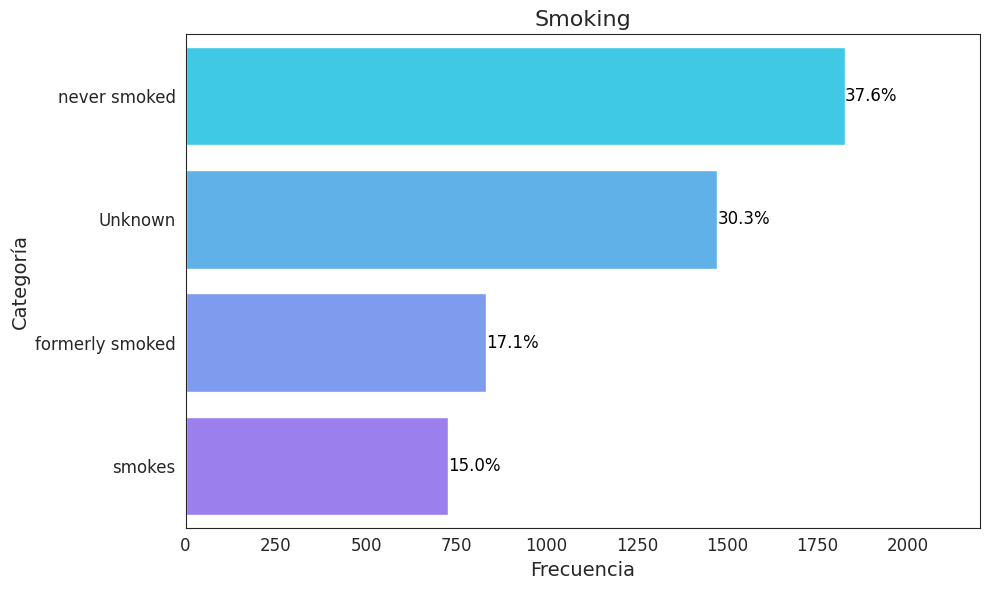

In [268]:
# Calcular la frecuencia de cada categoría
frecuencia_categoria = df2['Smoking'].value_counts().reset_index()
frecuencia_categoria.columns = ['Categoría', 'Frecuencia']
frecuencia_categoria = frecuencia_categoria.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
palette = sns.color_palette("cool")
ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)

# Añadir porcentaje sobre las barras
total_observaciones = len(df2)
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_width() / total_observaciones) # Calcular el porcentaje
    x = p.get_width()  # Posición x del texto
    y = p.get_y() + p.get_height() / 2  # Posición y del texto
    ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=12, color='black')

plt.xlim(0, 2200)
# Añadir título y etiquetas
plt.title('Smoking', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Categoría', fontsize=14)

# Personalizar los ejes si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
#plt.savefig('Fuma.pdf', format ="pdf", dpi=150)
plt.show()

### Gender

In [269]:
#Estadísticas básicas de la columna
df2["Gender"].describe()

count       4859
unique         3
top       Female
freq        2860
Name: Gender, dtype: object

In [270]:
# Conteo de casos de la columna Gender
df2["Gender"].value_counts()

Gender
Female    2860
Male      1925
Other       74
Name: count, dtype: int64

In [271]:
# Frecuencia porcentual de casos de gender
df2["Gender"].value_counts(normalize = True)*100

Gender
Female    58.859848
Male      39.617205
Other      1.522947
Name: proportion, dtype: float64

<ipython-input-272-1f33fe221545>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)


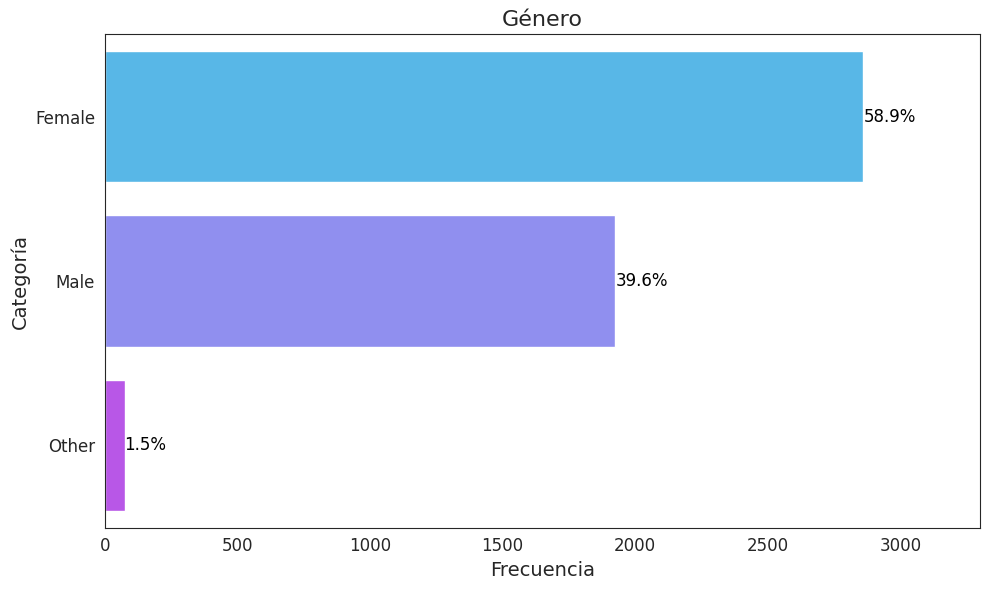

In [272]:
# Calcular la frecuencia de cada categoría
frecuencia_categoria = df2['Gender'].value_counts().reset_index()
frecuencia_categoria.columns = ['Categoría', 'Frecuencia']
frecuencia_categoria = frecuencia_categoria.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
palette = sns.color_palette("cool", 3)
ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)

# Añadir porcentaje sobre las barras
total_observaciones = len(df2)
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_width() / total_observaciones) # Calcular el porcentaje
    x = p.get_width()  # Posición x del texto
    y = p.get_y() + p.get_height() / 2  # Posición y del texto
    ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=12, color='black')

plt.xlim(0, 3300)
# Añadir título y etiquetas
plt.title('Género', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Categoría', fontsize=14)

# Personalizar los ejes si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
#plt.savefig('Genero.pdf', format ="pdf", dpi=150)
plt.show()

### Children

In [273]:
#Estadísticas básicas de la columna
df2["Children"].describe()

count    4859.000000
mean        1.251080
std         1.184823
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Children, dtype: float64

In [274]:
# Conteo de casos de columna Children
df2["Children"].value_counts()

Children
0    1869
3    1023
2    1004
1     953
4       4
5       4
6       1
7       1
Name: count, dtype: int64

In [275]:
# Frecuencia porcentual de casos de children
df2["Children"].value_counts(normalize = True)*100

Children
0    38.464705
3    21.053715
2    20.662688
1    19.613089
4     0.082321
5     0.082321
6     0.020580
7     0.020580
Name: proportion, dtype: float64

<ipython-input-276-174b40856e31>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=num_hijos, y=frecuencia, palette="cool")


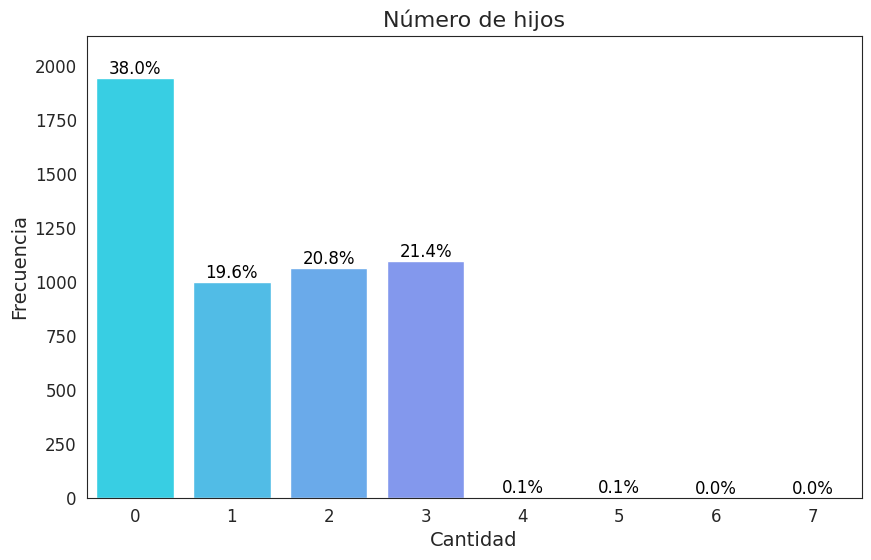

In [276]:
# Casos y frecuencia de cada caso de numero de hijos
num_hijos = [0, 1, 2, 3, 4, 5, 6, 7]  # Número de hijos
frecuencia = [1944, 1000, 1063, 1095, 4, 4, 1, 1]  # Frecuencia de cada número de hijos

# Calcular el total de observaciones
total_observaciones = sum(frecuencia)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=num_hijos, y=frecuencia, palette="cool")

# Añadir porcentaje sobre las barras
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_height() / total_observaciones) # Calcular el porcentaje
    x = p.get_x() + p.get_width() / 2  # Posición x del texto
    y = p.get_height()  # Posición y del texto
    ax.annotate(porcentaje, (x, y), ha='center', va='bottom', fontsize=12, color='black')

# Ajustar el límite en el eje y para que las barras más altas quepan completamente
plt.ylim(0, max(frecuencia) * 1.1)

# Añadir título y etiquetas
plt.title('Número de hijos', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar los ejes si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
#plt.savefig('Hijos.pdf', format ="pdf", dpi=150)
plt.show()

## Descripción de los datos numéricos

### Glucosa

In [277]:
# Estadísticas de columna glucosa
df2["Avg_glucose_level"].describe()

count    4859.000000
mean      105.163916
std        44.254869
min        55.120000
25%        77.065000
50%        91.650000
75%       113.370000
max       271.740000
Name: Avg_glucose_level, dtype: float64

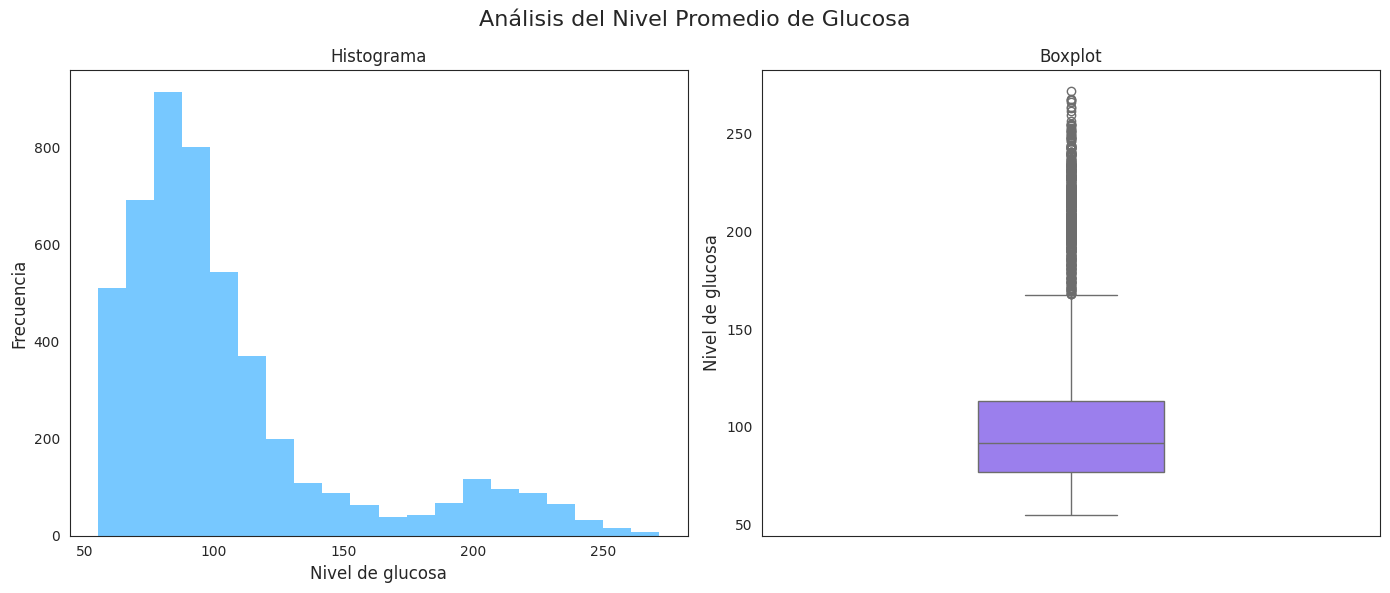

In [278]:
# Obtener la paleta "cool" de Seaborn
palette = sns.color_palette("cool")

# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con colores personalizados para las barras
sns.histplot(data=df2, x='Avg_glucose_level', bins=20, ax=axes[0], edgecolor='none', color=palette[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma', fontsize=12)
axes[0].set_xlabel('Nivel de glucosa', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Avg_glucose_level', ax=axes[1], width=0.3, color=palette[3])
axes[1].set_title("Boxplot", fontsize = 12)
axes[1].set_ylabel('Nivel de glucosa', fontsize = 12)

# Título general central
plt.suptitle('Análisis del Nivel Promedio de Glucosa', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
#plt.savefig('Glucosa.pdf', format ="pdf", dpi=150)
plt.show()

### Edad

In [279]:
# Estadísticas importantes de columna Age
df2["Age"].describe()

count    4859.000000
mean       42.838675
std        22.616826
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: Age, dtype: float64

In [280]:
# Aproximar edades a entero más cercano
df2['Age'] = df2['Age'].round()
df2["Age"] = df2["Age"].astype(int)

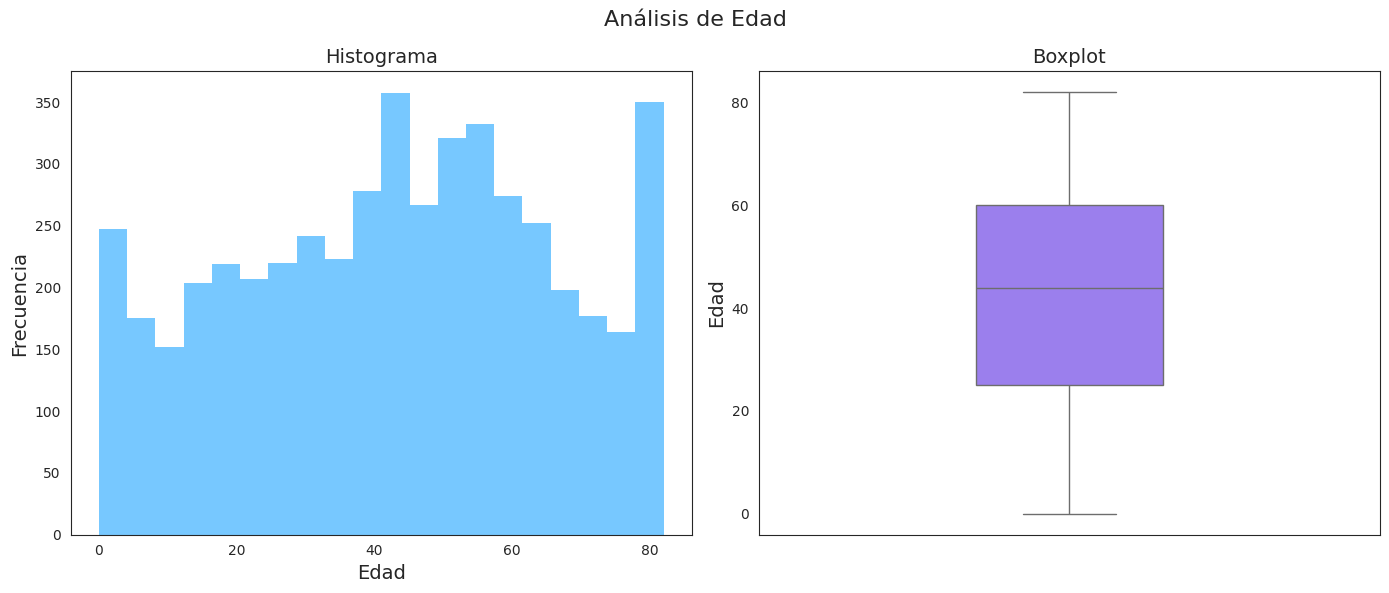

In [281]:
# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con Seaborn
sns.histplot(data=df2, x='Age', bins=20, edgecolor='none', ax=axes[0], color=sns.color_palette("cool")[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma', fontsize = 14)
axes[0].set_xlabel('Edad', fontsize = 14)
axes[0].set_ylabel('Frecuencia', fontsize = 14)

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Age', ax=axes[1], color=sns.color_palette("cool")[3], width = 0.3)  # Segundo color de la paleta "cool"
axes[1].set_title('Boxplot', fontsize = 14)
axes[1].set_ylabel('Edad', fontsize =14)

# Título general central
plt.suptitle('Análisis de Edad', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
#plt.savefig('Edad.pdf', format ="pdf", dpi=150)
plt.show()

### Análisis de la variable respuesta Stroke

In [282]:
# conteo de casos de stroke (aquí podemos observar que está desbalanceada)
df2["Stroke"].value_counts()

Stroke
0    4652
1     207
Name: count, dtype: int64

<ipython-input-283-d20377bd191d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Stroke', data=df2, palette=palette)
<ipython-input-283-d20377bd191d>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(x='Stroke', data=df2, palette=palette)


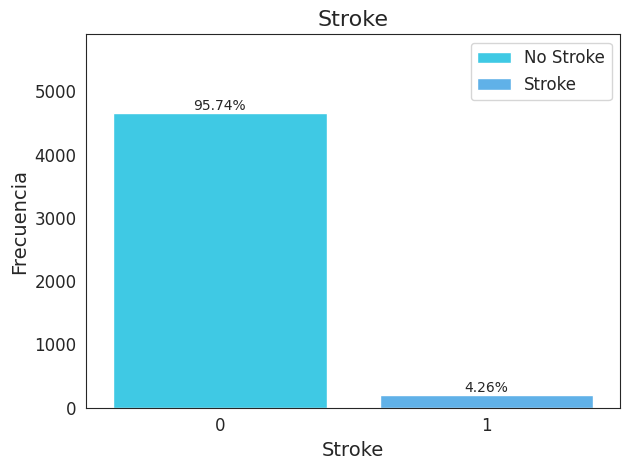

In [283]:
# Crear el gráfico
total = float(len(df2))
palette = sns.color_palette("cool")
ax = sns.countplot(x='Stroke', data=df2, palette=palette)

# Porcentajes encima de las columnas
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Stroke', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.ylim(0, 5900)
# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mover la leyenda a una ubicación adecuada
plt.legend(fontsize=12, title_fontsize='14', loc='upper right', bbox_to_anchor=(1, 1), labels=['No Stroke', 'Stroke'])

# Ajustar el diseño para que la leyenda no se solape con el gráfico
plt.tight_layout()

# Mostrar el gráfico
#plt.savefig('Stroke.pdf', format ="pdf", dpi=150)
plt.show()

In [284]:
# Estadísticas de todo el dataframe hasta el momento
df2.describe()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Age,Income,Children,Stroke
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,0.090554,0.049599,0.651574,0.492488,105.163916,28.620251,42.838856,116199.424161,1.251080,0.042601
std,0.287003,0.217137,0.476521,0.499995,44.254869,7.262062,22.616574,86397.519913,1.184823,0.201977
min,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,77.065000,23.500000,25.000000,43393.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,91.650000,28.000000,44.000000,101421.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,113.370000,32.900000,60.000000,182709.000000,2.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,271.740000,54.000000,82.000000,849615.000000,7.000000,1.000000


In [285]:
# Datatype de todas las columnas del dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4859 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       4859 non-null   uint64 
 1   Heart Disease      4859 non-null   uint64 
 2   Married            4859 non-null   uint64 
 3   Work               4859 non-null   object 
 4   Residence          4859 non-null   uint64 
 5   Avg_glucose_level  4859 non-null   float64
 6   Bmi                4859 non-null   float64
 7   Smoking            4859 non-null   object 
 8   Gender             4859 non-null   object 
 9   Age                4859 non-null   int64  
 10  Income             4859 non-null   int64  
 11  Children           4859 non-null   int64  
 12  Stroke             4859 non-null   int64  
dtypes: float64(2), int64(4), object(3), uint64(4)
memory usage: 531.5+ KB


In [286]:
# Se comprueba que ya no hayan valores nulos
df2.isnull().sum()

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Income               0
Children             0
Stroke               0
dtype: int64

In [287]:
# Se observa el tamaño del dataframe procesado
df2.shape

(4859, 13)

In [288]:
# Se comprueba que no hayan duplicados
df2.loc[df2.duplicated()]

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke


## Análisis adicionales

In [289]:
# Una edad coherente para trabajar
edad_min = 16
# Asegurando que 'Work' es tipo string para evitar errores
df2['Work'] = df2['Work'].astype(str)

# Cambiar el trabajo a 'Has Never Worked' para quienes tienen menos de 16 años y su trabajo actual es 'Children'
df2.loc[(df2['Age'] <= edad_min) & (df2['Work'] == 'Children'), 'Work'] = 'Never_worked'

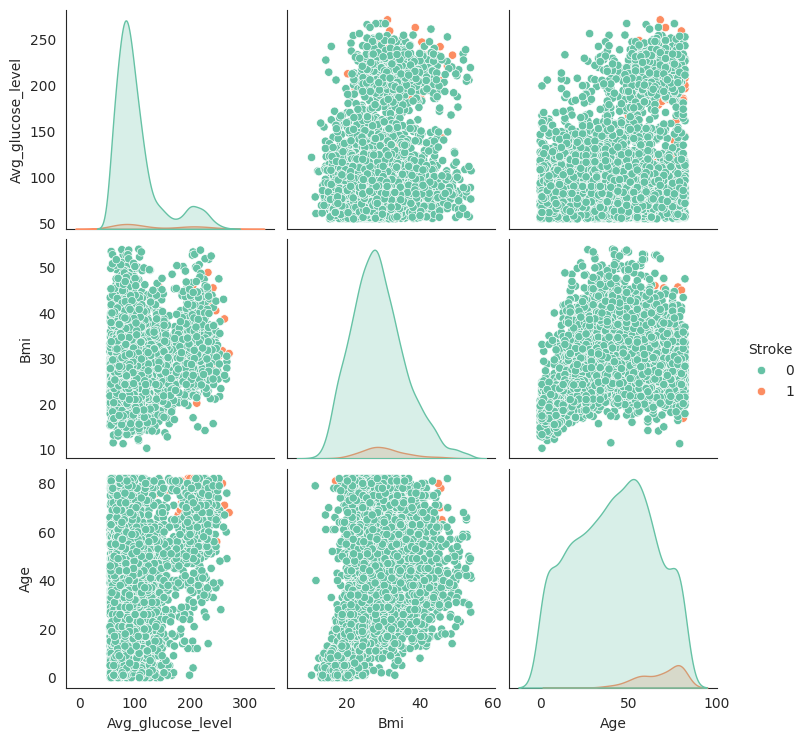

In [290]:
# Análisis entre nivel de glucosa, BMI, edad y si han sufrido un ataque cerebrovascular
g = sns.pairplot(df2, vars=["Avg_glucose_level", "Bmi", "Age"], hue = "Stroke", palette="Set2")
# Cambiar el color del fondo
g.fig.set_facecolor('white')
#plt.savefig('Matriz.pdf', format ="pdf", dpi=200)
# Mostrar la imagen
plt.show()

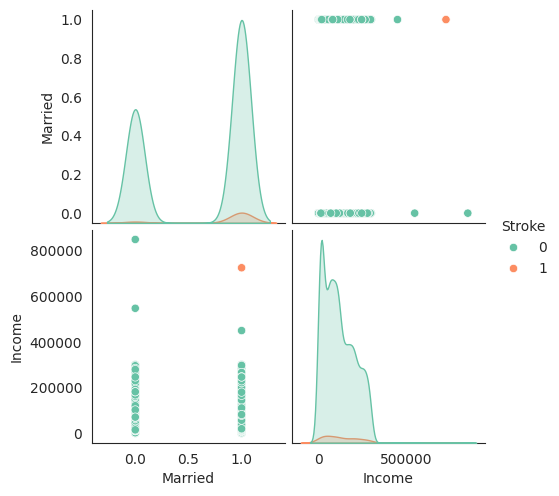

In [291]:
# Análisis entre categorías married, income y stroke
g = sns.pairplot(df2, vars=["Married", "Income"], hue = "Stroke", palette="Set2")
# Cambiar el color del fondo
g.fig.set_facecolor('white')
#plt.savefig('Matriz2.pdf', format ="pdf", dpi=200)
# Mostrar la imagen
plt.show()

# Transformar a variables dummies

In [292]:
# Selección de variables predictivas
predictors = ['Hypertension', 'Heart Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Smoking', 'Gender', 'Age', 'Income',
       'Children','Stroke' ]

# Convierto variables categoricas con más de dos categorías en dummies binarias
df3 = pd.get_dummies(df2[predictors], drop_first=True) # Se elimina primer caso para evitar colinealidad

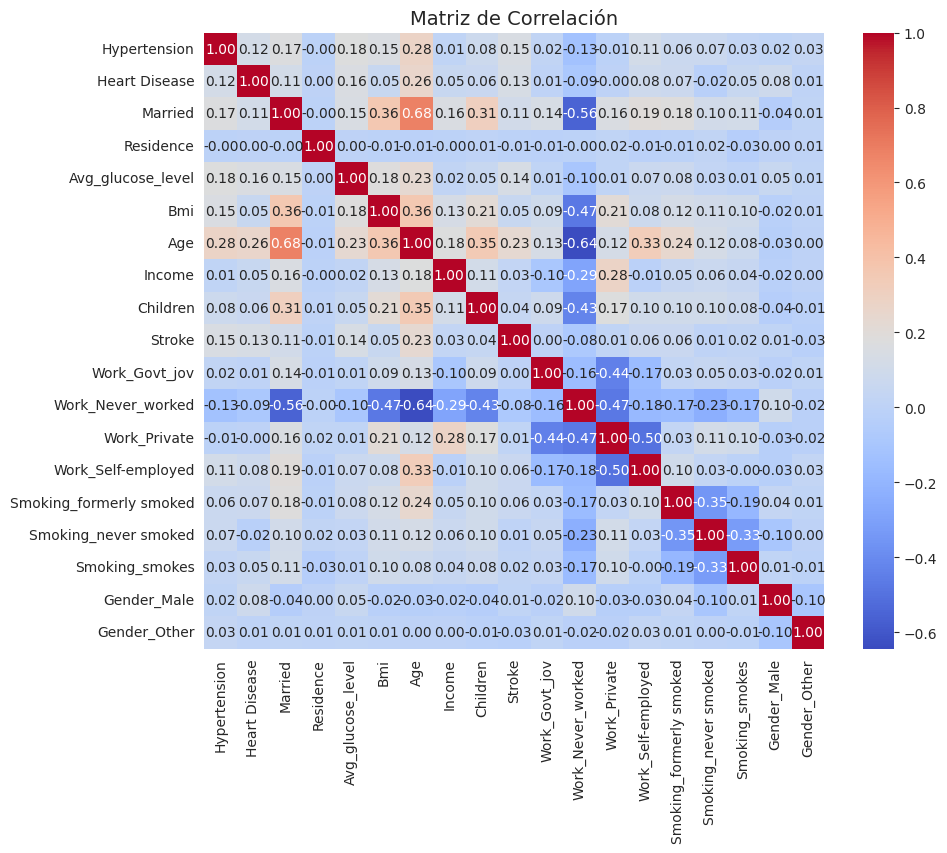

In [293]:
# Análisis de correlación entre variables numéricas
correlation_matrix = df3.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación", fontsize=14)

# Ajustar los márgenes de la figura para evitar recortes
plt.margins(0.1)

# Cambiar el color de fondo de toda la figura
plt.gcf().set_facecolor('white')

# Guardar la imagen con fondo blanco y evitando recortes
plt.savefig('Matriz de Correlacion.pdf', format ="pdf", dpi=150, bbox_inches='tight')

# Mostrar la imagen
plt.show()

In [294]:
# Base de datos después de todo el preprocesamiento
df3

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Age,Income,Children,Stroke,Work_Govt_jov,Work_Never_worked,Work_Private,Work_Self-employed,Smoking_formerly smoked,Smoking_never smoked,Smoking_smokes,Gender_Male,Gender_Other
0,1,0,1,1,190.14,36.5,73,0,3,1,False,False,True,False,False,True,False,False,False
1,0,0,1,0,208.65,30.7,63,1302,0,1,False,False,True,False,False,True,False,True,False
2,0,0,1,1,93.81,28.5,69,1887,1,1,False,False,True,False,False,False,False,True,False
3,0,1,1,1,103.68,25.0,82,2509,0,1,True,False,False,False,False,True,False,True,False
4,0,0,1,1,137.30,31.7,63,3079,2,1,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,1,1,82.99,30.6,35,37325,2,0,False,False,False,True,False,True,False,False,False
5108,0,0,1,1,166.29,25.6,51,56478,0,0,False,False,True,False,True,False,False,True,False
5109,0,0,1,0,85.28,26.2,44,77772,0,0,True,False,False,False,False,False,False,False,False
5110,1,0,1,0,90.51,31.0,33,18883,3,0,False,False,False,False,True,False,False,False,False


# Balancear bases de datos

Análisis conceptual, se explica en la presentación

# Dividir base de datos

In [295]:
# Dividir en entrenamiento y temporal (este último será dividido en validación y prueba)
df3_entrenamiento, df3_temporal = train_test_split(df3, test_size=0.3, random_state=42)

# Dividir el conjunto temporal en validación y prueba
df3_validación, df3_prueba = train_test_split(df3_temporal, test_size=(1/3), random_state=42)

In [296]:
# verificacion del modelo
print(f"Entrenamiento: {len(df3_entrenamiento)}")
print(f"Validación: {len(df3_validación)}")
print(f"Prueba: {len(df3_prueba)}")

Entrenamiento: 3401
Validación: 972
Prueba: 486


<ipython-input-297-71583c7d58a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df5, x='Tipo de set', y='Tamaño', palette='cool')
<ipython-input-297-71583c7d58a7>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)


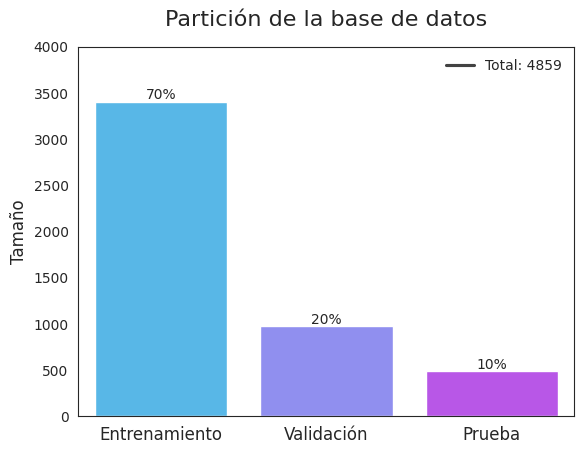

In [297]:
# Crear el gráfico
total = float(len(df2))

# Crear un DataFrame con los nombres de los tipos de set y su cantidad
df5 = pd.DataFrame({
    'Tipo de set': ['Entrenamiento', 'Validación', 'Prueba'],
    'Tamaño': [len(df3_entrenamiento), len(df3_validación), len(df3_prueba)]
})

# Crear el gráfico de barras apiladas usando Seaborn
ax = sns.barplot(data=df5, x='Tipo de set', y='Tamaño', palette='cool')

# Porcentajes encima de las columnas
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{}%'.format(round((height / total) * 100)),
            ha='center', va='bottom')

plt.ylim(0,4000)

# Mostrar el total en la parte superior derecha como leyenda
plt.legend(['Total: {}'.format(int(total))], loc='upper right', frameon=False)

# Modificar el tamaño de la fuente en el eje x
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Añadir etiquetas
plt.xlabel('', fontsize=12)
plt.ylabel('Tamaño', fontsize=12)
plt.title('Partición de la base de datos', fontsize=16, pad=15)

# Guardar el gráfico como PDF
plt.savefig('Partición.pdf', format='pdf')

# Mostrar el gráfico
plt.show()

In [298]:
# Guardamos el set de validación como variable
x_validacion = df3_validación.drop('Stroke', axis=1)

y_validacion = df3_validación['Stroke']

In [299]:
# Guardamos set de prueba como variable
x_prueba = df3_prueba.drop('Stroke', axis=1)

y_prueba = df3_prueba['Stroke']

# Análisis Balance de datos

## Over Sample

In [300]:
# Se selecciona las variables predictivas y variabled de respuesta
X_train = df3_entrenamiento.drop('Stroke', axis=1)
y_train = df3_entrenamiento['Stroke']

# Se inicializa el algoritmo SMOTE para realizar oversample
smote = SMOTE()

# Se ajusta y entrena con algoritmo
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

# Se convierte la nueva base de datos de nuevo a dataframe
df_oversample = pd.DataFrame(X_oversample, columns=X_train.columns)
df_oversample['Stroke'] = y_oversample


<ipython-input-301-c51696d494d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Stroke', data=df_oversample, palette=palette)
<ipython-input-301-c51696d494d4>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(x='Stroke', data=df_oversample, palette=palette)


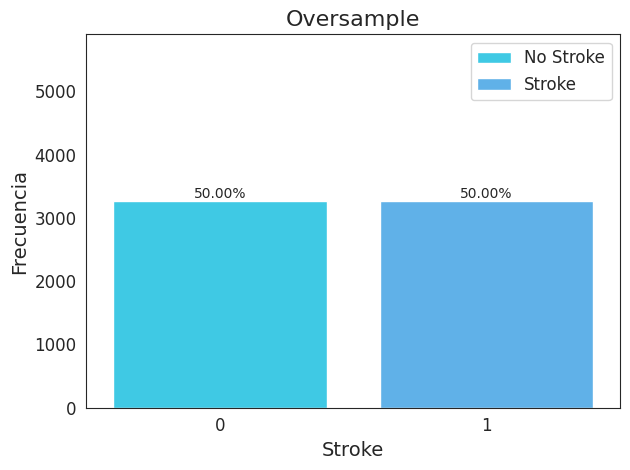

In [301]:
# Se comprueba que la base de datos si esté balanceada
# Calcular el porcentaje de cada categoría y crear gráfico
total = float(len(df_oversample))
palette = sns.color_palette("cool")
ax = sns.countplot(x='Stroke', data=df_oversample, palette=palette)

# Porcentaje encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Oversample', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.ylim(0, 5900)
# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mover la leyenda a una ubicación adecuada
plt.legend(fontsize=12, title_fontsize='14', loc='upper right', bbox_to_anchor=(1, 1), labels=['No Stroke', 'Stroke'])

# Ajustar el diseño para que la leyenda no se solape con el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Stroke_Over.pdf', format ="pdf", dpi=150)
plt.show()

## Under Sample

In [302]:
# Se selecciona las variables predictivas y variabled de respuesta
X_train = df3_entrenamiento.drop('Stroke', axis=1)
y_train = df3_entrenamiento['Stroke']

# Se inicializa el algortimo de balanceo
rus = RandomUnderSampler()

# Se aplica y ajusta el algoritmo
X_undersample, y_undersample = rus.fit_resample(X_train, y_train)

# Se convierte los resultados de vuelta a un dataframe
df_undersample = pd.DataFrame(X_undersample, columns=X_train.columns)
df_undersample['Stroke'] = y_undersample

<ipython-input-303-bd24279a3c5f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Stroke', data=df_undersample, palette=palette)
<ipython-input-303-bd24279a3c5f>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(x='Stroke', data=df_undersample, palette=palette)


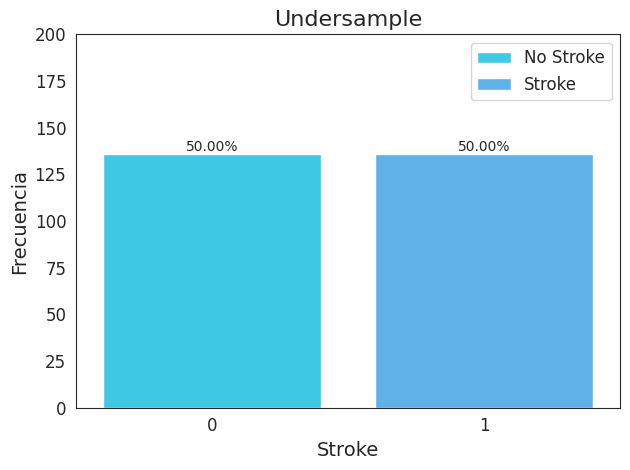

In [303]:
# Se comprueba que los datos estén balanceados
# Calcular el porcentaje de cada categoría y crear gráfico
total = float(len(df_undersample))
palette = sns.color_palette("cool")
ax = sns.countplot(x='Stroke', data=df_undersample, palette=palette)

# Porcentaje encima de las columnas
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Undersample', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.ylim(0, 200)
# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mover la leyenda a una ubicación adecuada
plt.legend(fontsize=12, title_fontsize='14', loc='upper right', bbox_to_anchor=(1, 1), labels=['No Stroke', 'Stroke'])

# Ajustar el diseño para que la leyenda no se solape con el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Stroke_Under.pdf', format ="pdf", dpi=150)
plt.show()

## Prueba estadística

In [304]:
# Supongamos que ya tienes tus datos X y y

scaler = StandardScaler()

X_train = df3_entrenamiento.drop('Stroke', axis=1)
y_train = df3_entrenamiento['Stroke']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalizar las variables predictivas
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Crear el pipeline con SMOTE y el modelo de regresión logística para oversampling
pipeline_oversampled = make_pipeline(SMOTE(random_state=42), LogisticRegression())

# Definir la métrica de evaluación como la precisión
scoring = make_scorer(precision_score)

# Realizar validación cruzada para obtener la precisión del modelo con oversampling
precisions_oversampled = cross_val_score(pipeline_oversampled, X_train, y_train, cv=5, scoring=scoring)

print("Precisión del modelo con oversampling (validación cruzada):", precisions_oversampled)

# Crear el pipeline con RandomUnderSampler y el modelo de regresión logística para undersampling
pipeline_undersampled = make_pipeline(RandomUnderSampler(random_state=42), LogisticRegression())

# Realizar validación cruzada para obtener la precisión del modelo con undersampling
precisions_undersampled = cross_val_score(pipeline_undersampled, X_train, y_train, cv=5, scoring=scoring)

print("Precisión del modelo con undersampling (validación cruzada):", precisions_undersampled)

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(precisions_oversampled, precisions_undersampled)

# Imprimir los resultados
print("t-statistic:", t_stat)
print("p-value:", p_value)

Precisión del modelo con oversampling (validación cruzada): [0.12592593 0.10062893 0.11347518 0.12318841 0.10365854]
Precisión del modelo con undersampling (validación cruzada): [0.0955414  0.08791209 0.10344828 0.0962963  0.09550562]
t-statistic: 3.1375412220390344
p-value: 0.01385657042484608


# Bases de Datos Entrenamiento

## Entrenamiento

In [305]:
# Guardamos como variables predictivas y de respuesta de entrenamiento para hacer el fit
x_entrenamiento = df_oversample.drop('Stroke', axis=1)

y_entrenamiento = df_oversample['Stroke']

## Validación

In [306]:
x_validacion
y_validacion

688     0
210     1
2257    0
971     0
1099    0
       ..
3590    0
2652    0
4975    0
4324    0
506     0
Name: Stroke, Length: 972, dtype: int64

## Prueba

In [307]:
x_prueba
y_prueba

4093    0
1767    0
3710    0
2791    0
774     0
       ..
2705    0
2962    0
3758    0
2707    0
4219    0
Name: Stroke, Length: 486, dtype: int64

# Función de evaluación de desempeño

In [308]:
def evaluacion (predecir, respuesta):

  # Calcula la precisión del modelo comparando las predicciones con las verdaderas etiquetas del conjunto de entrenamiento.
  precision = precision_score(predecir, respuesta, pos_label=1)

  # Calcula la sensibilidad (recall)
  sensibilidad = recall_score(predecir, respuesta, pos_label=1)

  # Calcula la exactitud
  exactitud = accuracy_score(predecir, respuesta)

  # Calcula la especificidad
  especificidad = recall_score(predecir, respuesta, pos_label=0)

  # matriz de confusion
  cm = confusion_matrix(predecir, respuesta)

  # AUC y Curva ROC
  fpr, tpr, _ = roc_curve(predecir, respuesta)
  auc_roc = roc_auc_score(predecir, respuesta)

  # Definir la figura y los subplots
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  # Matriz de confusión
  plt.sca(axes[0])
  plt.title("Matriz de Confusión")
  sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
  plt.xlabel("Predicción")
  plt.ylabel("Real")

  # Curva ROC
  plt.sca(axes[1])
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Tasa de Falsos Positivos')
  plt.ylabel('Tasa de Verdaderos Positivos')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")

  # Mostrar los subplots
  plt.tight_layout()
  plt.show()

  # Imprime los resultados
  print("\nExactitud: {:.2%}".format(exactitud))
  print("\nPrecisión para la clase 'Stroke': {:.2%}".format(precision))
  print("\nSensibilidad para la clase 'Stroke': {:.2%}".format(sensibilidad))
  print("\nEspecificidad para la clase 'Stroke': {:.2%}".format(especificidad))
  print("\nAUC: {:.2%}".format(auc_roc))

# Algoritmo 1: Regresión Logística

In [309]:
# Función para normalizar variables
scaler = StandardScaler()
X_train = scaler.fit_transform(x_validacion)

# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

# Definir los hiperparámetros a optimizar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Realizar una búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_validacion)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo final con los mejores hiperparámetros
final_model = LogisticRegression(**best_params)
final_model.fit(X_train, y_validacion)

# Obtener los coeficientes y el intercepto del modelo
coef = final_model.coef_
intercept = final_model.intercept_
print("Coeficientes:", coef)
print("Intercepto:", intercept)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Mejores hiperparámetros: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Coeficientes: [[ 2.02892273e-01  1.35917560e-01 -5.59470992e-02  0.00000000e+00
   3.46671930e-01  1.34437253e-01  1.58925065e+00  4.84712356e-02
  -1.98387378e-01  0.00000000e+00  5.19350292e-01 -1.26568716e-01
   1.88551395e-01 -1.43036707e-03 -1.82142845e-01  0.00000000e+00
  -1.08606898e-01 -1.49263124e-01]]
Intercepto: [-1.11017182]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [310]:
# Función para normalizar variables
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_entrenamiento)

# Añadir una constante a las variables predictoras
X_train = add_constant(x_train_scaled)

# Configurar los hiperparámetros
C = 0.1
class_weight = 'balanced'
penalty = 'l1'
solver = 'liblinear'

# Ajustar el modelo de regresión logística con los hiperparámetros
logit_model = sm.Logit(y_entrenamiento.astype(float), X_train.astype(float))
logit_results = logit_model.fit_regularized(method='l1', alpha=C, disp=0)

# Resultados
print(logit_results.summary())

                           Logit Regression Results                           
Dep. Variable:                 Stroke   No. Observations:                 6530
Model:                          Logit   Df Residuals:                     6514
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                  0.6019
Time:                        17:15:41   Log-Likelihood:                -1801.9
converged:                       True   LL-Null:                       -4526.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8761      0.265      3.309      0.001       0.357       1.395
x1                  0        nan        nan        nan         nan         nan
x2            -0.2682      0.039     -6.900      0.0

## Evaluación

### Entrenamiento

In [311]:
# Agrega la constante a las características
X_train = sm.add_constant(x_entrenamiento)

# Predecir las probabilidades usando el modelo de regresión logística
y_pred = logit_results.predict(X_train.astype(float))

# Convertir probabilidades a clases binarias
y_pred_binary = (y_pred > 0.5).astype(int)

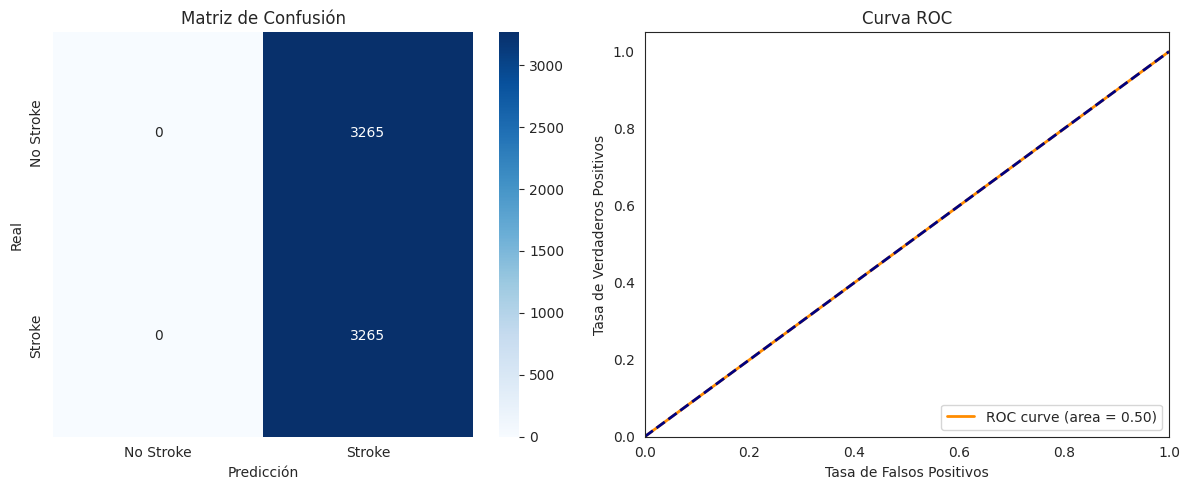


Exactitud: 50.00%

Precisión para la clase 'Stroke': 50.00%

Sensibilidad para la clase 'Stroke': 100.00%

Especificidad para la clase 'Stroke': 0.00%

AUC: 50.00%


In [312]:
evaluacion(y_entrenamiento, y_pred_binary)

### Validación

In [313]:
# Agrega la constante a las características
X_valid = sm.add_constant(x_validacion)

# Predecir las probabilidades usando el modelo de regresión logística
y_pred = logit_results.predict(X_valid.astype(float))

# Convertir probabilidades a clases binarias
y_pred_binary = (y_pred > 0.5).astype(int)

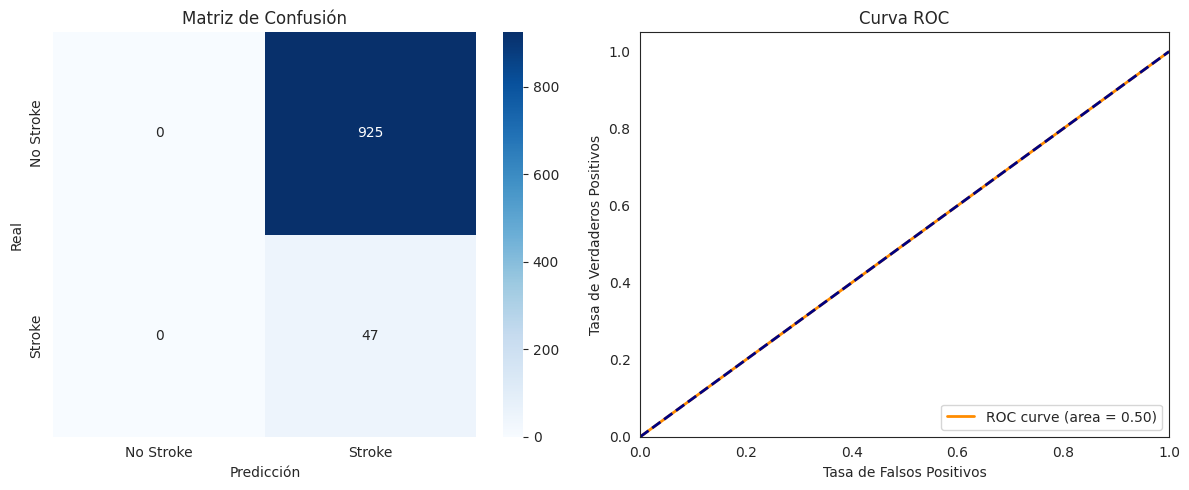


Exactitud: 4.84%

Precisión para la clase 'Stroke': 4.84%

Sensibilidad para la clase 'Stroke': 100.00%

Especificidad para la clase 'Stroke': 0.00%

AUC: 50.00%


In [314]:
evaluacion(y_validacion, y_pred_binary)

### Prueba

In [315]:
# Agrega la constante a las características
X_test = sm.add_constant(x_prueba)

# Predecir las probabilidades usando el modelo de regresión logística
y_pred = logit_results.predict(X_test.astype(float))

# Convertir probabilidades a clases binarias
y_pred_binary = (y_pred > 0.5).astype(int)

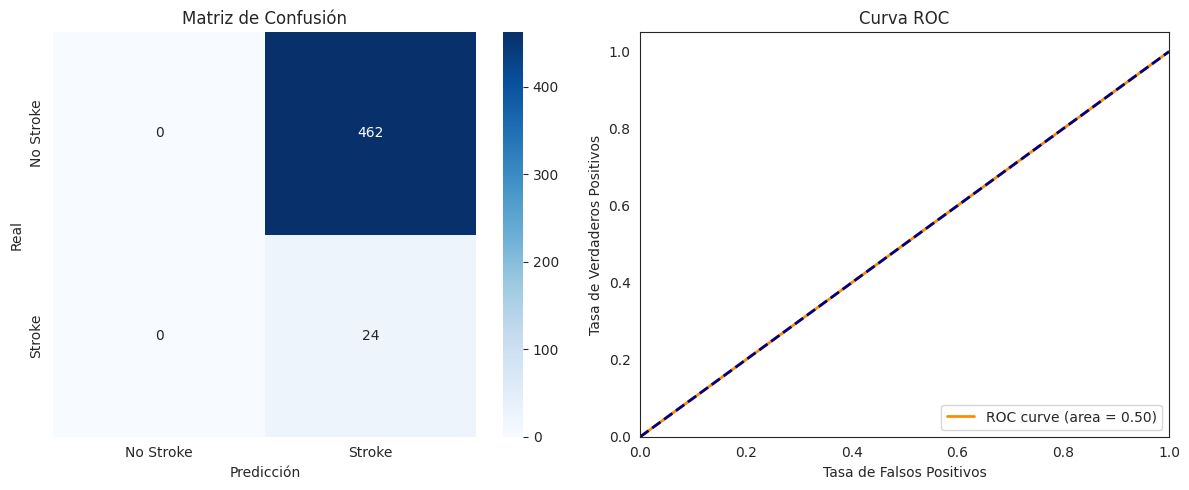


Exactitud: 4.94%

Precisión para la clase 'Stroke': 4.94%

Sensibilidad para la clase 'Stroke': 100.00%

Especificidad para la clase 'Stroke': 0.00%

AUC: 50.00%


In [316]:
evaluacion(y_prueba, y_pred_binary)

# Algoritmo 2: Ensamble

In [317]:
# Se crea una instancia de la clase DecisionTreeClassifier, que representa un clasificador basado en árboles de decisión.
dtc = DecisionTreeClassifier()

# Se crea una instancia de BaggingClassifier. Este clasificador utilizará el árbol de decisión anterior como el estimador base.
# Se configura para usar 50 árboles de decisión y permite el muestreo con reemplazo (bootstrap=True).
bag_model = BaggingClassifier(estimator=dtc, n_estimators=50, bootstrap=True)

# Entrena el modelo de Bagging con el conjunto de datos de entrenamiento. Usa las variables predictivas 'x_entrenamiento'
# y la variable objetivo 'y_entrenamiento' para aprender a clasificar.
bag_model.fit(x_entrenamiento, y_entrenamiento)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

## Optimización Hiperparámetros

In [318]:
# Crea un arreglo que comienza en 1, termina antes de 250, incrementando en 5 en cada paso.
param_range = np.arange(1, 250, 5)

In [319]:
# Calculan las puntuaciones de validación para diferentes valores del parámetro 'n_estimators' del BaggingClassifier.
# Conjunto de datos de validación ('x_validacion', 'y_validacion') y  evalúa el rendimiento con la métrica de 'accuracy'.
# 'cv = 5' usa validación cruzada de 5 particiones.
# 'n_jobs = -1' permite usar todos los procesadores disponibles para la evaluación
train_scores, test_scores = validation_curve(BaggingClassifier(), x_validacion, y_validacion, param_name="n_estimators",
                                            param_range=param_range, cv=5, scoring="recall", n_jobs=-1)


In [320]:
# Calcula la media de las puntuaciones de entrenamiento para cada valor del parámetro evaluado.
validation_mean = np.mean(train_scores, axis=1)

# Calcula la desviación estándar de las puntuaciones de entrenamiento para cada valor del parámetro evaluado.
validation_std = np.std(train_scores, axis=1)

In [321]:
# Calcula la media de las puntuaciones de prueba para cada valor del parámetro evaluado durante la validación cruzada.
test_mean = np.mean(test_scores, axis = 1)

# Calcula la desviación estándar de las puntuaciones de prueba, ofreciendo una medida de la variabilidad de las puntuaciones alrededor de su media para cada valor del parámetro.
test_std = np.std(test_scores, axis=1)

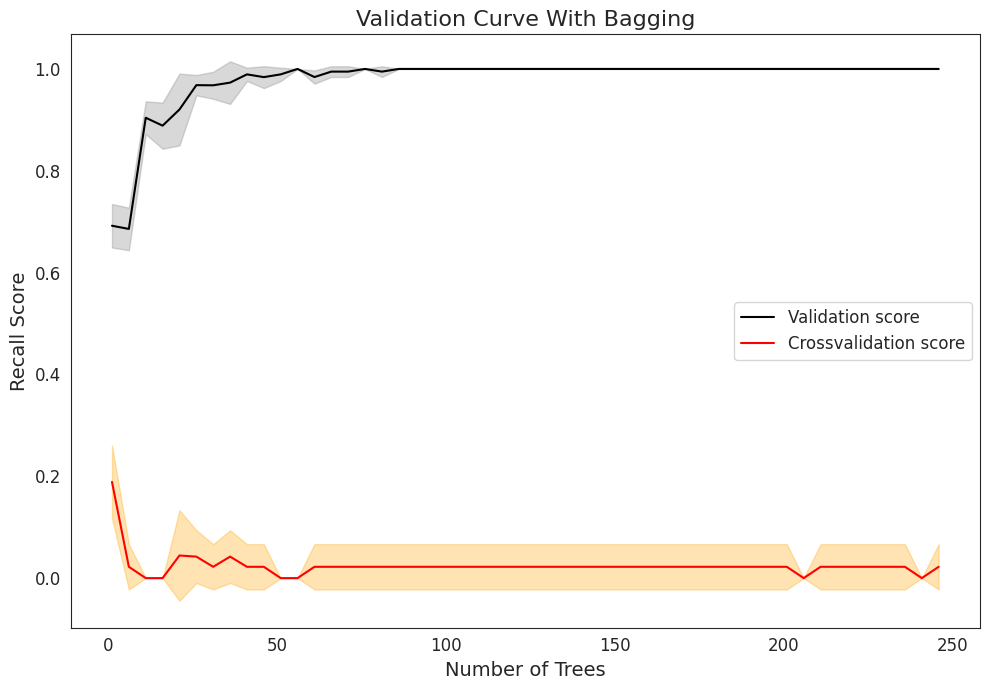

In [322]:
# Establecer el estilo de Seaborn en "white" para el fondo de los gráficos.
sns.set_style("white")

# Crear una nueva figura y ejes con un tamaño específico de 10x7 pulgadas.
plt.figure(figsize=(10, 7))

# Traza los datos de la media de las puntuaciones de validación contra el rango de parámetros, usando líneas negras.
sns.lineplot(x=param_range, y=validation_mean, label="Validation score", color="black")

# Traza los datos de la media de las puntuaciones de prueba (cross-validation) contra el rango de parámetros, usando líneas rojas.
sns.lineplot(x=param_range, y=test_mean, label="Crossvalidation score", color="red")

# Traza las bandas de precisión (intervalos de confianza) alrededor de las medias de las puntuaciones de validación
plt.fill_between(param_range, validation_mean - validation_std, validation_mean + validation_std, color="gray", alpha=0.3)

# Traza las bandas de precisión.
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.3)

# Configura etiquetas y título del gráfico con tamaños de fuente específicos.
plt.title("Validation Curve With Bagging", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Recall Score", fontsize=14)

# Ajusta el tamaño de las marcas de los ejes para mejorar la legibilidad.
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajusta el diseño y la ubicación para evitar superposiciones.
plt.tight_layout()

# Muestra la leyenda en la ubicación especificada
plt.legend(loc="best", fontsize=12)

# Guardar el gráfico como una imagen en el disco o computadora
plt.savefig('Validacion.png', dpi=150, bbox_inches='tight', facecolor='white')

# Mostrar el gráfico generado.
plt.show()


## Evaluación

### Entrenamiento

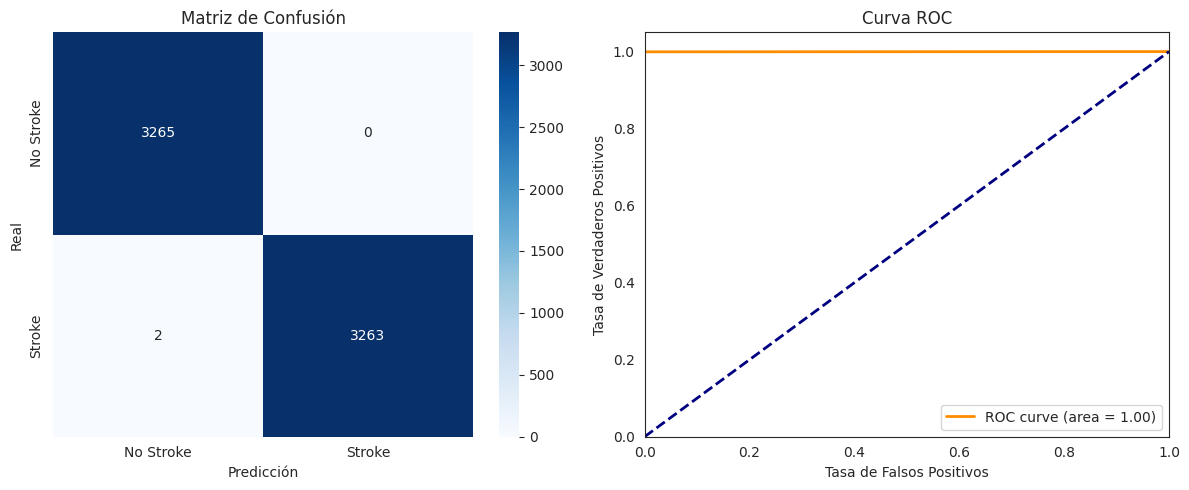


Exactitud: 99.97%

Precisión para la clase 'Stroke': 100.00%

Sensibilidad para la clase 'Stroke': 99.94%

Especificidad para la clase 'Stroke': 100.00%

AUC: 99.97%


In [347]:
# Realizar predicciones en el conjunto de prueba usando el modelo de bagging previamente entrenado.
y_pred = bag_model.predict(x_entrenamiento)
evaluacion(y_entrenamiento, y_pred)

### Validación

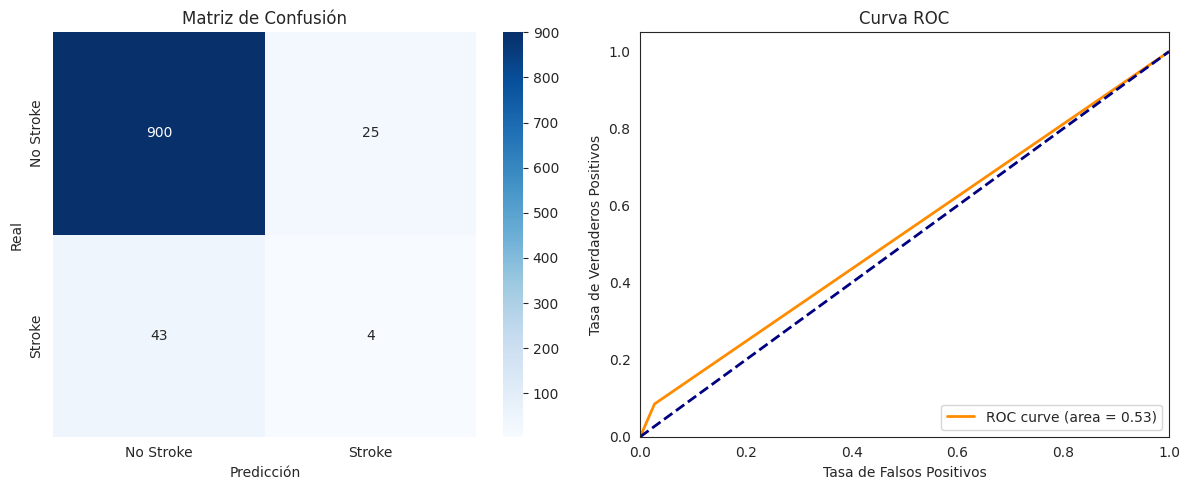


Exactitud: 93.00%

Precisión para la clase 'Stroke': 13.79%

Sensibilidad para la clase 'Stroke': 8.51%

Especificidad para la clase 'Stroke': 97.30%

AUC: 52.90%


In [348]:
y_pred = bag_model.predict(x_validacion)
evaluacion(y_validacion, y_pred)

### Prueba

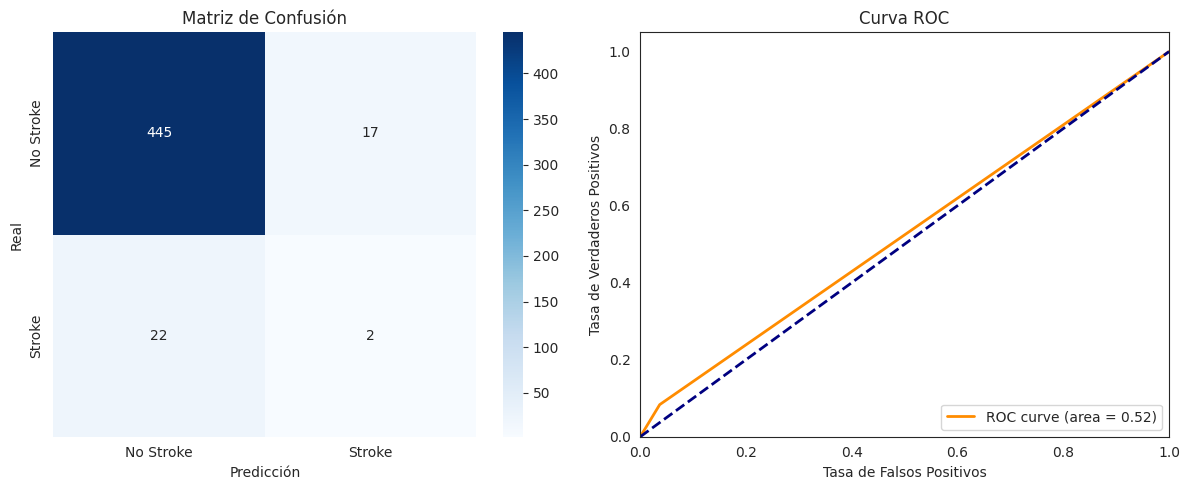


Exactitud: 91.98%

Precisión para la clase 'Stroke': 10.53%

Sensibilidad para la clase 'Stroke': 8.33%

Especificidad para la clase 'Stroke': 96.32%

AUC: 52.33%


In [349]:
y_pred = bag_model.predict(x_prueba)
evaluacion(y_prueba, y_pred)

# Algoritmo 3: Random Forest

## Optimización de Hiperparámetros

In [329]:
param_dist = {
    'n_estimators': randint(100, 500),  # Árboles en el bosque. Se buscan valores entre 100 y 500.
    'max_depth': randint(3, 20),        # Valores posibles entre 3 y 20.
    'min_samples_split': randint(2, 11),# Número mínimo de muestras requeridas para dividir un nodo interno entre 2 y 11.
    'min_samples_leaf': randint(1, 11), # Número mínimo de muestras requeridas en un nodo hoja entre 1 y 11.
    'bootstrap': [True, False]          # Método de selección de muestras para entrenar cada árbole
}

# Instancia del clasificador de bosque aleatorio
rf = RandomForestClassifier()

# Buscar aleatoriamente los mejores hiperparámetros
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Ajustar el modelo
rf_random.fit(x_entrenamiento, y_entrenamiento)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", rf_random.best_params_)  # Muestra los mejores hiperparámetros encontrados en la búsqueda.

# Evaluar el modelo con el conjunto de validación
model_eval = rf_random.best_estimator_.score(x_validacion, y_validacion)
# Imprime la evaluación del modelo.
print("Evaluación del modelo en el conjunto de validación:", model_eval)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 244}
Evaluación del modelo en el conjunto de validación: 0.9403292181069959


## Evaluación

### Entrenamiento

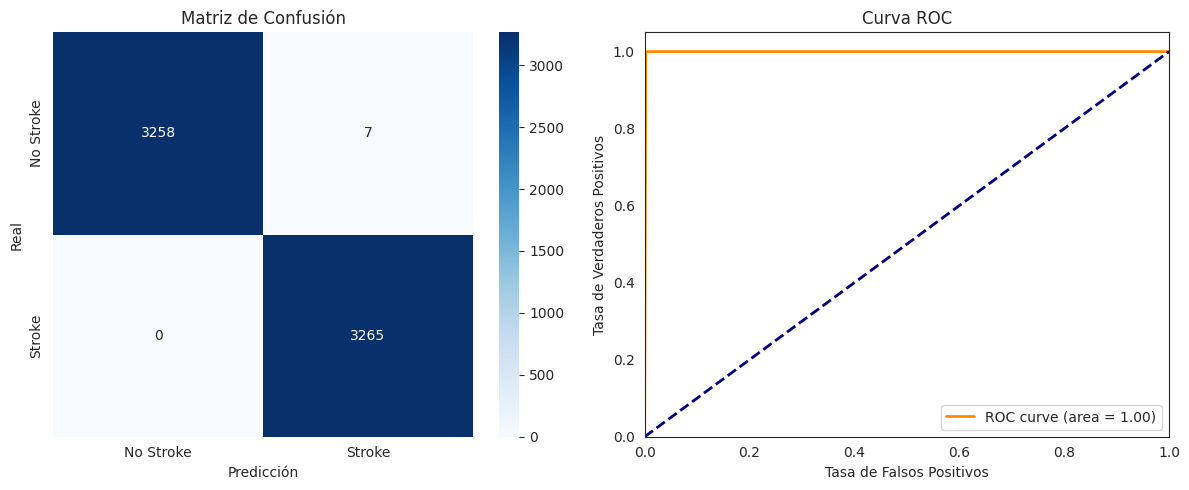


Exactitud: 99.89%

Precisión para la clase 'Stroke': 99.79%

Sensibilidad para la clase 'Stroke': 100.00%

Especificidad para la clase 'Stroke': 99.79%

AUC: 99.89%


In [330]:
# Hago predicciones en el conjunto de entrenamiento
y_pred_entrenamiento = rf_random.best_estimator_.predict(x_entrenamiento)
evaluacion(y_entrenamiento, y_pred_entrenamiento)

### Validación

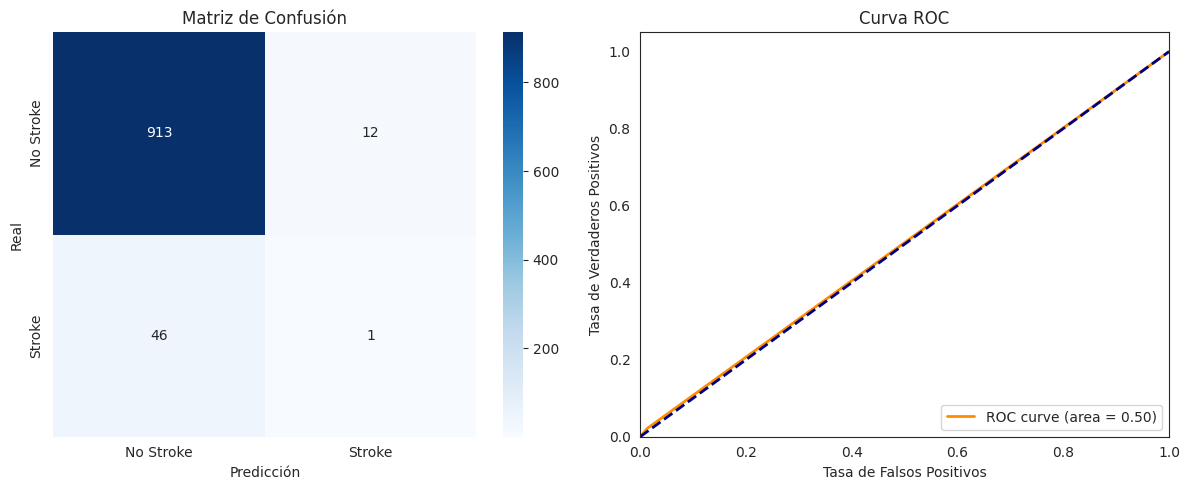


Exactitud: 94.03%

Precisión para la clase 'Stroke': 7.69%

Sensibilidad para la clase 'Stroke': 2.13%

Especificidad para la clase 'Stroke': 98.70%

AUC: 50.42%


In [331]:
# Hago predicciones en el conjunto de validacion
y_pred_validacion = rf_random.best_estimator_.predict(x_validacion)
evaluacion(y_validacion, y_pred_validacion)

### Prueba

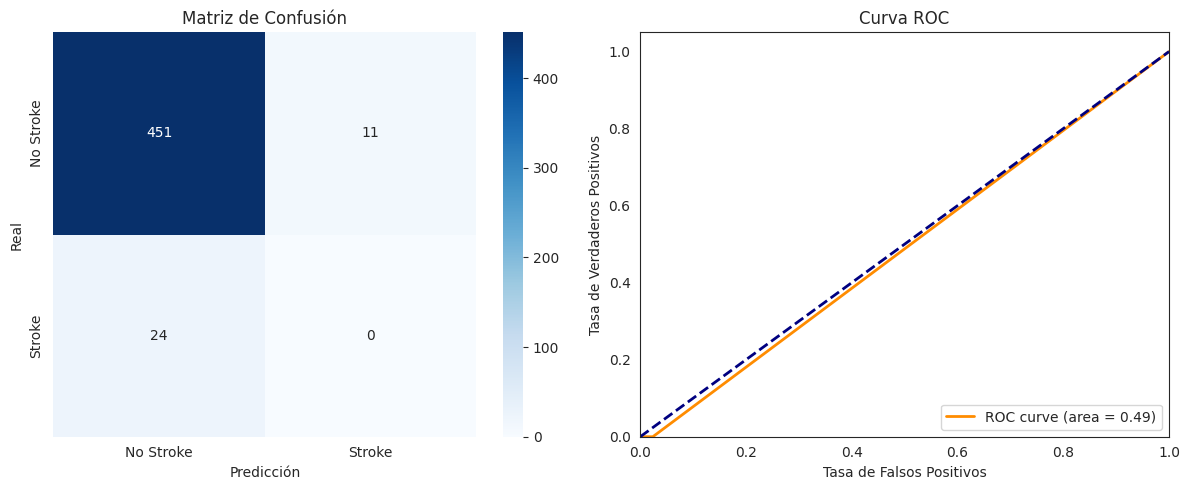


Exactitud: 92.80%

Precisión para la clase 'Stroke': 0.00%

Sensibilidad para la clase 'Stroke': 0.00%

Especificidad para la clase 'Stroke': 97.62%

AUC: 48.81%


In [332]:
# Hago predicciones en el conjunto de prueba
y_pred_prueba = rf_random.best_estimator_.predict(x_prueba)
evaluacion(y_prueba, y_pred_prueba)

# Algoritmo 4: Naive Bayes

## Optimización de Hiperparámetros

In [333]:
# Crear el modelo Naive Bayes
naive_bayes_model = GaussianNB()

# Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5, scoring='recall')

# Entrenar el modelo con búsqueda de cuadrícula
grid_search.fit(x_validacion, y_validacion)

# Obtener los mejores parámetros encontrados
mejores_parametros = grid_search.best_params_

# Crear un nuevo modelo Naive Bayes con los mejores parámetros encontrados
naive_bayes_model_optimizado = GaussianNB(var_smoothing=mejores_parametros['var_smoothing'])

# Entrenar el modelo optimizado
naive_bayes_model_optimizado.fit(x_entrenamiento, y_entrenamiento)

GaussianNB()

In [334]:
mejores_parametros

{'var_smoothing': 1e-09}

## Evaluación

### Entrenamiento

In [335]:
# Crear el modelo Naive Bayes
naive_bayes_model = GaussianNB()

# Entrenar el modelo
naive_bayes_model.fit(x_entrenamiento, y_entrenamiento)

GaussianNB()

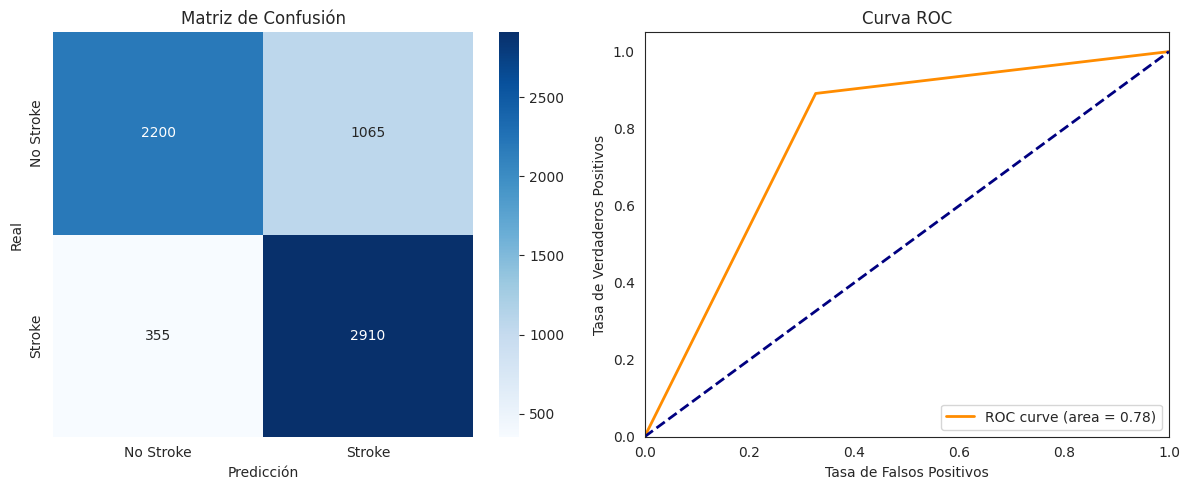


Exactitud: 78.25%

Precisión para la clase 'Stroke': 73.21%

Sensibilidad para la clase 'Stroke': 89.13%

Especificidad para la clase 'Stroke': 67.38%

AUC: 78.25%


In [336]:
# Predecir resultados para el conjunto de prueba
y_pred = naive_bayes_model.predict(x_entrenamiento)
evaluacion(y_entrenamiento, y_pred)

### Validación

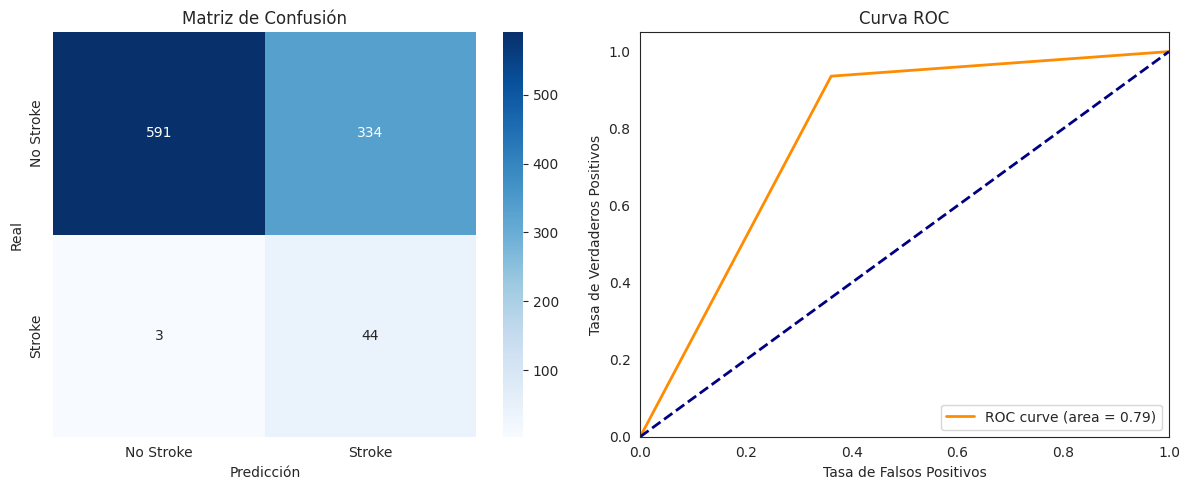


Exactitud: 65.33%

Precisión para la clase 'Stroke': 11.64%

Sensibilidad para la clase 'Stroke': 93.62%

Especificidad para la clase 'Stroke': 63.89%

AUC: 78.75%


In [337]:
y_pred = naive_bayes_model_optimizado.predict(x_validacion)
evaluacion(y_validacion, y_pred)

### Prueba

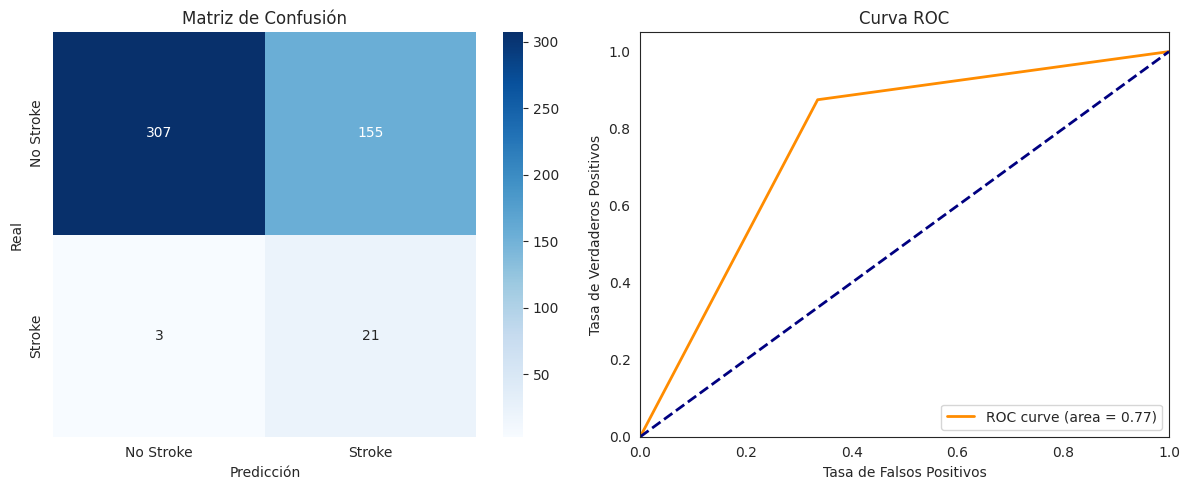


Exactitud: 67.49%

Precisión para la clase 'Stroke': 11.93%

Sensibilidad para la clase 'Stroke': 87.50%

Especificidad para la clase 'Stroke': 66.45%

AUC: 76.98%


In [338]:
y_pred = naive_bayes_model_optimizado.predict(x_prueba)
evaluacion(y_prueba, y_pred)

# Selección de variables predictivas

## 25 estimadores

In [339]:
rf_classifier = RandomForestClassifier(n_estimators=25, random_state=42)

# Ajustar el clasificador a los datos de entrenamiento
rf_classifier.fit(x_entrenamiento, y_entrenamiento)

# Obtener la importancia de las características
feature_importances = rf_classifier.feature_importances_

# Crear un DataFrame para visualizar las características y su importancia
feature_importance_df = pd.DataFrame({'Feature': range(x_entrenamiento.shape[1]), 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(feature_importance_df)

Características más importantes:
    Feature  Importance
6         6    0.244443
4         4    0.093900
7         7    0.092873
11       11    0.081131
5         5    0.072663
16       16    0.064512
12       12    0.060788
13       13    0.048443
3         3    0.045024
14       14    0.043213
8         8    0.041248
15       15    0.036294
9         9    0.022875
2         2    0.018639
10       10    0.014335
0         0    0.012732
1         1    0.006367
17       17    0.000519


In [340]:
# Índices de características seleccionadas
selected_features = [6, 7, 4, 11, 5, 16]

# Imprimir las características junto con sus importancias
for i in selected_features:
    feature_name = x_entrenamiento.columns[i]
    importance = feature_importance_df.loc[feature_importance_df['Feature'] == i, 'Importance'].values[0]
    print(f"{feature_name}: {round(importance*100,3)}%")

Age: 24.444%
Income: 9.287%
Avg_glucose_level: 9.39%
Work_Private: 8.113%
Bmi: 7.266%
Gender_Male: 6.451%


## 50 estimadores

In [341]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Ajustar el clasificador a los datos de entrenamiento
rf_classifier.fit(x_entrenamiento, y_entrenamiento)

# Obtener la importancia de las características
feature_importances = rf_classifier.feature_importances_

# Crear un DataFrame para visualizar las características y su importancia
feature_importance_df = pd.DataFrame({'Feature': range(x_entrenamiento.shape[1]), 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(feature_importance_df)

Características más importantes:
    Feature  Importance
6         6    0.268064
7         7    0.094553
4         4    0.089406
11       11    0.082788
5         5    0.068543
12       12    0.058697
16       16    0.052595
13       13    0.049157
3         3    0.042275
8         8    0.041914
14       14    0.040908
15       15    0.038194
9         9    0.023957
2         2    0.016875
10       10    0.012413
0         0    0.012325
1         1    0.006764
17       17    0.000572


In [342]:
# Índices de características seleccionadas
selected_features = [6, 7, 4, 11, 5, 16]

# Imprimir las características junto con sus importancias
for i in selected_features:
    feature_name = x_entrenamiento.columns[i]
    importance = feature_importance_df.loc[feature_importance_df['Feature'] == i, 'Importance'].values[0]
    print(f"{feature_name}: {round(importance*100,3)}%")

Age: 26.806%
Income: 9.455%
Avg_glucose_level: 8.941%
Work_Private: 8.279%
Bmi: 6.854%
Gender_Male: 5.259%


## 75 estimadores

In [343]:
rf_classifier = RandomForestClassifier(n_estimators=75, random_state=42)

# Ajustar el clasificador a los datos de entrenamiento
rf_classifier.fit(x_entrenamiento, y_entrenamiento)

# Obtener la importancia de las características
feature_importances = rf_classifier.feature_importances_

# Crear un DataFrame para visualizar las características y su importancia
feature_importance_df = pd.DataFrame({'Feature': range(x_entrenamiento.shape[1]), 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(feature_importance_df)

Características más importantes:
    Feature  Importance
6         6    0.271375
7         7    0.094924
4         4    0.090431
11       11    0.084007
5         5    0.066803
12       12    0.056442
13       13    0.051659
16       16    0.049003
14       14    0.043327
8         8    0.040312
3         3    0.039741
15       15    0.039537
9         9    0.024753
2         2    0.016367
0         0    0.012944
10       10    0.011089
1         1    0.006680
17       17    0.000605


In [344]:
# Índices de características seleccionadas
selected_features = [6, 4, 7, 11, 5, 16]

# Imprimir las características junto con sus importancias
for i in selected_features:
    feature_name = x_entrenamiento.columns[i]
    importance = feature_importance_df.loc[feature_importance_df['Feature'] == i, 'Importance'].values[0]
    print(f"{feature_name}: {round(importance*100,3)}%")

Age: 27.138%
Avg_glucose_level: 9.043%
Income: 9.492%
Work_Private: 8.401%
Bmi: 6.68%
Gender_Male: 4.9%


## 100 estimadores

In [345]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el clasificador a los datos de entrenamiento
rf_classifier.fit(x_entrenamiento, y_entrenamiento)

# Obtener la importancia de las características
feature_importances = rf_classifier.feature_importances_

# Crear un DataFrame para visualizar las características y su importancia
feature_importance_df = pd.DataFrame({'Feature': range(x_entrenamiento.shape[1]), 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(feature_importance_df)

Características más importantes:
    Feature  Importance
6         6    0.277221
7         7    0.094664
4         4    0.088536
11       11    0.085144
5         5    0.066688
12       12    0.058067
13       13    0.049457
16       16    0.046744
14       14    0.042169
8         8    0.040270
3         3    0.040064
15       15    0.038360
9         9    0.024852
2         2    0.016833
0         0    0.012674
10       10    0.010806
1         1    0.006858
17       17    0.000594


In [346]:
# Índices de características seleccionadas
selected_features = [6, 4, 7, 11, 5, 13]

# Imprimir las características junto con sus importancias
for i in selected_features:
    feature_name = x_entrenamiento.columns[i]
    importance = feature_importance_df.loc[feature_importance_df['Feature'] == i, 'Importance'].values[0]
    print(f"{feature_name}: {round(importance*100,3)}%")

Age: 27.722%
Avg_glucose_level: 8.854%
Income: 9.466%
Work_Private: 8.514%
Bmi: 6.669%
Smoking_formerly smoked: 4.946%


# Referencias

Alberca, A. S. (2022, May 12). La librería Numpy | Aprende con Alf. Aprende Con Alf. https://aprendeconalf.es/docencia/python/manual/numpy/

Baldeón, G. (Marzo de 2024). Machine Learning. Quito, Pichincha, Ecuador.

OpenAI. (2022). ChatGPT https://beta.openai.com/

Supervised learning. (n.d.). Scikit-learn. https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

User Guide — pandas 2.2.1 documentation. (n.d.). https://pandas.pydata.org/docs/user_guide/index.html#user-guide